PART A: Define the problem and perform Exploratory Data Analysis
- Problem definition - Check shape, Data types, and statistical summary - Univariate analysis - Multivariate analysis - Use appropriate visualizations to identify the patterns and insights - Key meaningful observations on individual variables and the relationship between variables


In [179]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import matplotlib.style

import statsmodels.api as sm
from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_squared_error
from statsmodels.stats.outliers_influence import variance_inflation_factor
import math

In [180]:
df=pd.read_csv("C:/Users/user/Desktop/PGDSBA/FRA/Company%28FRA%29.csv")

In [181]:
df.head()

Num  Networth Next Year  Total assets  Net worth  Total income  \
0    1               395.3         827.6      336.5         534.1   
1    2                36.2          67.7       24.3         137.9   
2    3                84.0         238.4       78.9         331.2   
3    4              2041.4        6883.5     1443.3        8448.5   
4    5                41.8          90.9       47.0         388.6   

   Change in stock  Total expenses  Profit after tax  PBDITA    PBT  ...  \
0             13.5           508.7              38.9   124.4   64.6  ...   
1             -3.7           131.0               3.2     5.5    1.0  ...   
2            -18.1           309.2               3.9    25.8   10.5  ...   
3            212.2          8482.4             178.3   418.4  185.1  ...   
4              3.4           392.7              -0.7     7.2   -0.6  ...   

   Debtors turnover  Finished goods turnover  WIP turnover  \
0              5.65                     3.99          3.37   
1               NaN                      NaN           NaN   
2              2.51                    17.67          8.76   
3              1.91                    18.14         18.62   
4             68.00                    45.87         28.67   

   Raw material turnover  Shares outstanding  Equity face value    EPS  \
0                  14.87           8760056.0               10.0   4.44   
1                    NaN                 NaN                NaN   0.00   
2                   8.35                 NaN                NaN   0.00   
3                  11.11          10000000.0               10.0  17.60   
4                  19.93            107315.0              100.0  -6.52   

   Adjusted EPS  Total liabilities  PE on BSE  
0          4.44              827.6        NaN  
1          0.00               67.7        NaN  
2          0.00              238.4        NaN  
3         17.60             6883.5        NaN  
4         -6.52               90.9        NaN  

[5 rows x 51 columns]

In [182]:
df.shape

(4256, 51)

In [183]:
df.tail()

Num  Networth Next Year  Total assets  Net worth  Total income  \
4251  4252                 0.2           0.4        0.2           NaN   
4252  4253                93.3         159.6       86.7         172.9   
4253  4254               932.2         833.8      664.6        2314.7   
4254  4255                64.6          95.0       48.5         110.5   
4255  4256                 0.0         384.6      111.3         345.8   

      Change in stock  Total expenses  Profit after tax  PBDITA    PBT  ...  \
4251              NaN             NaN               NaN     NaN    NaN  ...   
4252              0.1           169.7               3.3    18.4    3.7  ...   
4253             32.1          2151.6             195.2   348.4  303.0  ...   
4254              4.6           113.5               1.6     9.7    2.6  ...   
4255             11.3           341.7              15.4    57.6   20.7  ...   

      Debtors turnover  Finished goods turnover  WIP turnover  \
4251              0.00                      NaN           NaN   
4252              1.80                    11.00          8.28   
4253              6.08                    59.28         31.14   
4254              3.71                    78.99         11.51   
4255              4.71                    53.37          8.33   

      Raw material turnover  Shares outstanding  Equity face value    EPS  \
4251                   0.00                 NaN                NaN   0.00   
4252                   9.88           8162700.0               10.0   0.42   
4253                   9.87           7479762.0               10.0  26.58   
4254                  14.95                 NaN                NaN   0.00   
4255                   3.74            960000.0               10.0  15.63   

      Adjusted EPS  Total liabilities  PE on BSE  
4251          0.00                0.4        NaN  
4252          0.42              159.6      16.81  
4253         26.58              833.8       5.69  
4254          0.00               95.0        NaN  
4255         15.63              384.6        NaN  

[5 rows x 51 columns]

In [184]:
df.head()

Num  Networth Next Year  Total assets  Net worth  Total income  \
0    1               395.3         827.6      336.5         534.1   
1    2                36.2          67.7       24.3         137.9   
2    3                84.0         238.4       78.9         331.2   
3    4              2041.4        6883.5     1443.3        8448.5   
4    5                41.8          90.9       47.0         388.6   

   Change in stock  Total expenses  Profit after tax  PBDITA    PBT  ...  \
0             13.5           508.7              38.9   124.4   64.6  ...   
1             -3.7           131.0               3.2     5.5    1.0  ...   
2            -18.1           309.2               3.9    25.8   10.5  ...   
3            212.2          8482.4             178.3   418.4  185.1  ...   
4              3.4           392.7              -0.7     7.2   -0.6  ...   

   Debtors turnover  Finished goods turnover  WIP turnover  \
0              5.65                     3.99          3.37   
1               NaN                      NaN           NaN   
2              2.51                    17.67          8.76   
3              1.91                    18.14         18.62   
4             68.00                    45.87         28.67   

   Raw material turnover  Shares outstanding  Equity face value    EPS  \
0                  14.87           8760056.0               10.0   4.44   
1                    NaN                 NaN                NaN   0.00   
2                   8.35                 NaN                NaN   0.00   
3                  11.11          10000000.0               10.0  17.60   
4                  19.93            107315.0              100.0  -6.52   

   Adjusted EPS  Total liabilities  PE on BSE  
0          4.44              827.6        NaN  
1          0.00               67.7        NaN  
2          0.00              238.4        NaN  
3         17.60             6883.5        NaN  
4         -6.52               90.9        NaN  

[5 rows x 51 columns]

In [185]:
df.iloc[0:5,15:30]

PAT as % of net worth   Sales  Income from fincial services  Other income  \
0                  12.27   533.5                           0.6           NaN   
1                   0.00   135.5                           NaN           0.2   
2                   5.07   330.6                           0.6           NaN   
3                  13.17  8444.2                           2.0           NaN   
4                  -1.48   387.6                           0.2           0.8   

   Total capital  Reserves and funds  Borrowings  \
0           87.6               249.0       390.7   
1           11.9                 4.3        16.6   
2           25.0                56.7        44.7   
3          100.0              1343.3      2789.3   
4           10.7                35.8        25.5   

   Current liabilities & provisions  Deferred tax liability  \
0                              43.9                    56.4   
1                              23.7                     3.1   
2                             102.2                     9.8   
3                            2650.8                     0.1   
4                              14.1                     4.3   

   Shareholders funds  Cumulative retained profits  Capital employed  TOL/TNW  \
0               336.5                        248.9             727.2     1.28   
1                24.3                         -8.2              40.9     1.53   
2                78.9                         53.1             123.6     1.70   
3              1443.3                        593.3            4232.6     3.69   
4                47.0                         35.8              72.5     0.81   

   Total term liabilities / tangible net worth  \
0                                         0.99   
1                                         0.21   
2                                         0.33   
3                                         0.22   
4                                         0.44   

   Contingent liabilities / Net worth (%)  
0                                  186.21  
1                                   47.74  
2                                   30.42  
3                                   10.79  
4                                    0.00

In [186]:
df.iloc[0:5,30:45]

Contingent liabilities  Net fixed assets  Investments  Current assets  \
0                   626.6             461.1         18.1           257.6   
1                    11.6              18.5          0.2            39.0   
2                    24.0              56.8          0.2           158.3   
3                   155.7               8.6          NaN          6576.4   
4                     NaN              36.3          NaN            39.8   

   Net working capital  Quick ratio (times)  Current ratio (times)  \
0                163.1                 0.99                   2.52   
1                  3.9                 0.67                   1.11   
2                 38.3                 1.11                   1.31   
3               1455.1                 0.99                   1.28   
4                 20.8                 0.35                   2.09   

   Debt to equity ratio (times)  Cash to current liabilities (times)  \
0                          1.16                                 0.06   
1                          0.68                                 0.02   
2                          0.57                                 0.19   
3                          1.93                                 0.07   
4                          0.54                                 0.05   

   Cash to average cost of sales per day  Creditors turnover  \
0                                   5.41               11.60   
1                                   1.62                 NaN   
2                                  26.42                2.24   
3                                  15.93                3.48   
4                                   0.85               21.67   

   Debtors turnover  Finished goods turnover  WIP turnover  \
0              5.65                     3.99          3.37   
1               NaN                      NaN           NaN   
2              2.51                    17.67          8.76   
3              1.91                    18.14         18.62   
4             68.00                    45.87         28.67   

   Raw material turnover  
0                  14.87  
1                    NaN  
2                   8.35  
3                  11.11  
4                  19.93

In [187]:
df.iloc[0:5,45:50]

Shares outstanding  Equity face value    EPS  Adjusted EPS  \
0           8760056.0               10.0   4.44          4.44   
1                 NaN                NaN   0.00          0.00   
2                 NaN                NaN   0.00          0.00   
3          10000000.0               10.0  17.60         17.60   
4            107315.0              100.0  -6.52         -6.52   

   Total liabilities  
0              827.6  
1               67.7  
2              238.4  
3             6883.5  
4               90.9

In [188]:
df.shape

(4256, 51)

In [189]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4256 entries, 0 to 4255
Data columns (total 51 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   Num                                          4256 non-null   int64  
 1   Networth Next Year                           4256 non-null   float64
 2   Total assets                                 4256 non-null   float64
 3   Net worth                                    4256 non-null   float64
 4   Total income                                 4025 non-null   float64
 5   Change in stock                              3706 non-null   float64
 6   Total expenses                               4091 non-null   float64
 7   Profit after tax                             4102 non-null   float64
 8   PBDITA                                       4102 non-null   float64
 9   PBT                                          4102 non-null   float64
 10  

In [190]:
df.describe().transpose().round(2)

count         mean  \
Num                                          4256.0      2128.50   
Networth Next Year                           4256.0      1344.74   
Total assets                                 4256.0      3573.62   
Net worth                                    4256.0      1351.95   
Total income                                 4025.0      4688.19   
Change in stock                              3706.0        43.70   
Total expenses                               4091.0      4356.30   
Profit after tax                             4102.0       295.05   
PBDITA                                       4102.0       605.94   
PBT                                          4102.0       410.26   
Cash profit                                  4102.0       408.27   
PBDITA as % of total income                  4177.0         3.18   
PBT as % of total income                     4177.0       -18.20   
PAT as % of total income                     4177.0       -20.03   
Cash profit as % of total income             4177.0        -9.02   
PAT as % of net worth                        4256.0        10.17   
Sales                                        3951.0      4645.68   
Income from fincial services                 3145.0        81.36   
Other income                                 2700.0        55.95   
Total capital                                4251.0       224.56   
Reserves and funds                           4158.0      1210.56   
Borrowings                                   3825.0      1176.25   
Current liabilities & provisions             4146.0       960.63   
Deferred tax liability                       2887.0       234.50   
Shareholders funds                           4256.0      1376.49   
Cumulative retained profits                  4211.0       937.18   
Capital employed                             4256.0      2433.62   
TOL/TNW                                      4256.0         4.03   
Total term liabilities / tangible net worth  4256.0         1.85   
Contingent liabilities / Net worth (%)       4256.0        55.71   
Contingent liabilities                       2854.0       948.55   
Net fixed assets                             4124.0      1209.49   
Investments                                  2541.0       721.87   
Current assets                               4176.0      1350.36   
Net working capital                          4219.0       162.87   
Quick ratio (times)                          4151.0         1.50   
Current ratio (times)                        4151.0         2.26   
Debt to equity ratio (times)                 4256.0         2.87   
Cash to current liabilities (times)          4151.0         0.53   
Cash to average cost of sales per day        4156.0       145.16   
Creditors turnover                           3865.0        16.81   
Debtors turnover                             3871.0        17.93   
Finished goods turnover                      3382.0        84.37   
WIP turnover                                 3492.0        28.68   
Raw material turnover                        3828.0        17.73   
Shares outstanding                           3446.0  23764909.56   
Equity face value                            3446.0     -1094.83   
EPS                                          4256.0      -196.22   
Adjusted EPS                                 4256.0      -197.53   
Total liabilities                            4256.0      3573.62   
PE on BSE                                    1629.0        55.46   

                                                      std           min  \
Num                                          1.228750e+03  1.000000e+00   
Networth Next Year                           1.593674e+04 -7.426560e+04   
Total assets                                 3.007444e+04  1.000000e-01   
Net worth                                    1.296131e+04  0.000000e+00   
Total income                                 5.391895e+04  0.000000e+00   
Change in stock                              4.369200e+02 -

In [191]:
df.isnull().sum()

Num                                               0
Networth Next Year                                0
Total assets                                      0
Net worth                                         0
Total income                                    231
Change in stock                                 550
Total expenses                                  165
Profit after tax                                154
PBDITA                                          154
PBT                                             154
Cash profit                                     154
PBDITA as % of total income                      79
PBT as % of total income                         79
PAT as % of total income                         79
Cash profit as % of total income                 79
PAT as % of net worth                             0
Sales                                           305
Income from fincial services                   1111
Other income                                   1556
Total capita

In [192]:
df.isna().sum().sum()

# we have 17778 missing values

17778

In [193]:
4256*51

217056

In [194]:
(17778/217056)*100

8.190513047324192

In [195]:
df.duplicated().sum()

# There are no duplicated values

0

In [196]:
df.shape

(4256, 51)

In [197]:
#Get Unique Values (not required as there is no object value)
for feature in df.columns: 
    if df[feature].dtype == 'object': 
        print(feature)
        print(df[feature].value_counts())
        print('\n')

# Univariate Analysis

Num
Skew : 0.0


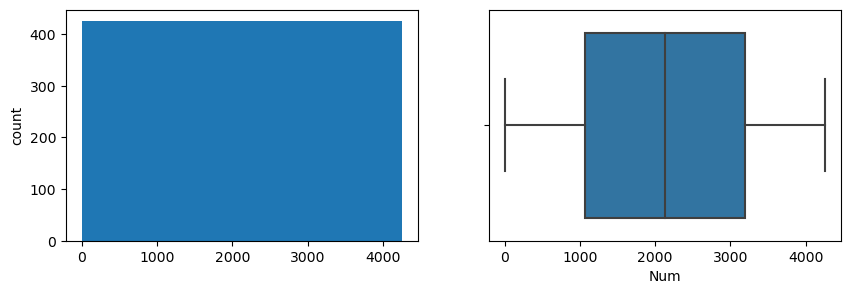

Networth Next Year
Skew : 36.38


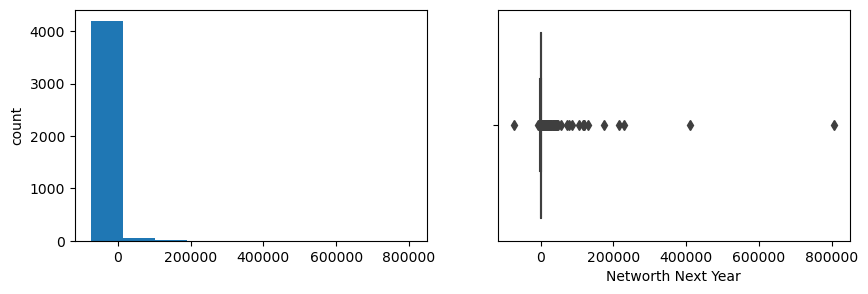

Total assets
Skew : 26.42


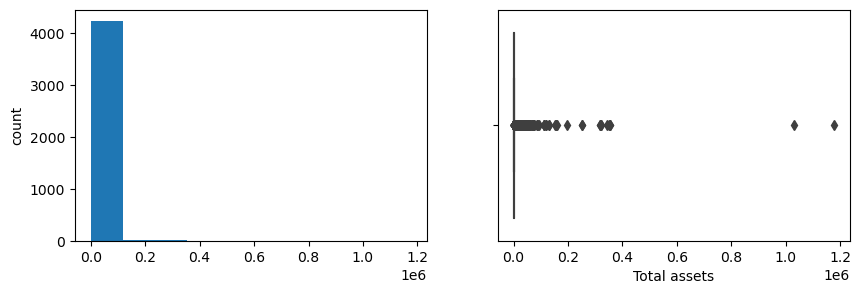

Net worth
Skew : 31.85


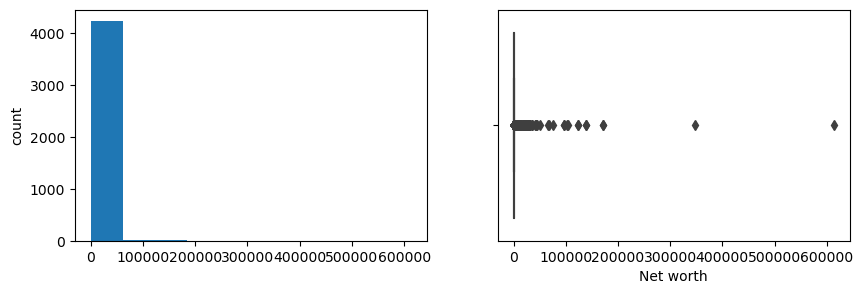

Total income
Skew : 31.44


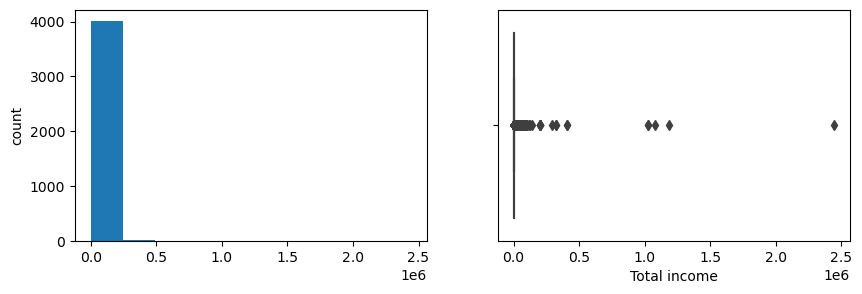

Change in stock
Skew : 18.02


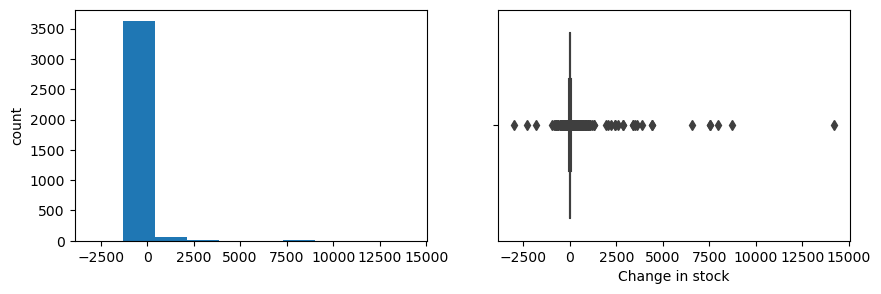

Total expenses
Skew : 32.19


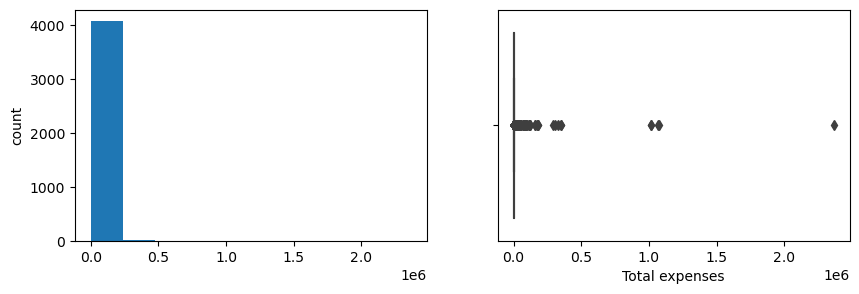

Profit after tax
Skew : 24.29


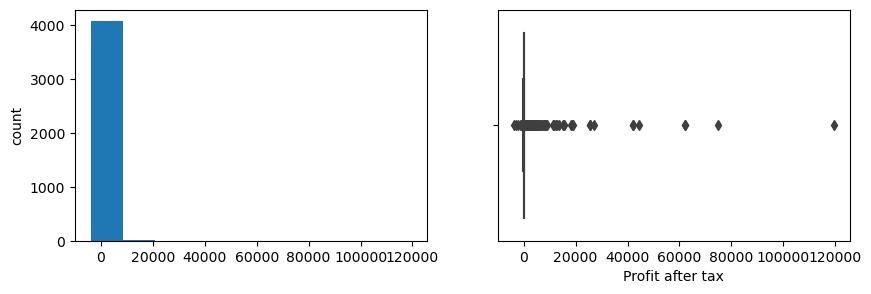

PBDITA
Skew : 24.12


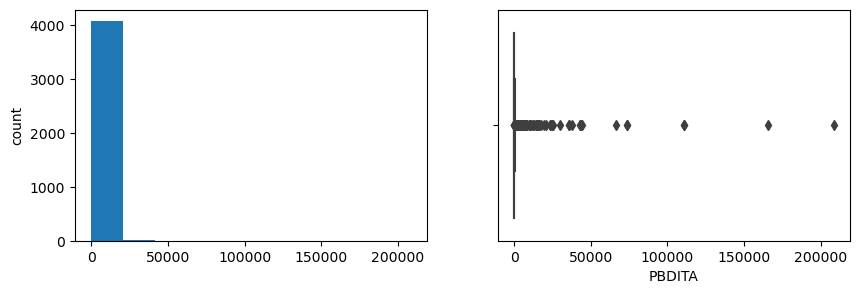

PBT
Skew : 22.28


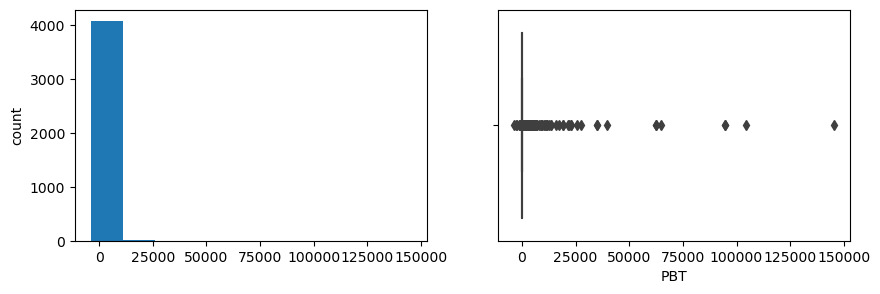

Cash profit
Skew : 27.67


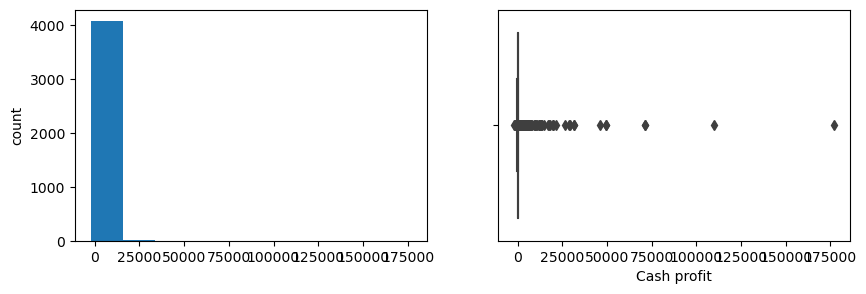

PBDITA as % of total income
Skew : -29.03


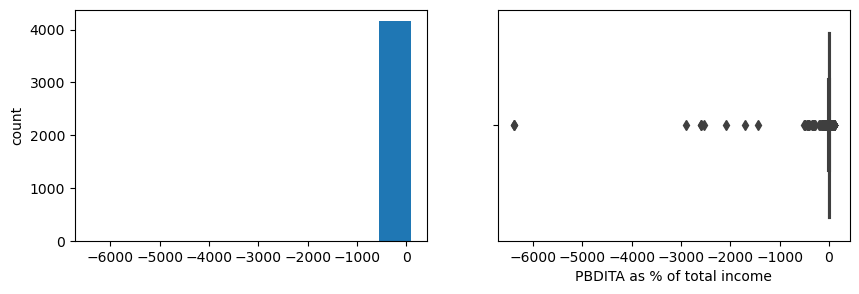

PBT as % of total income
Skew : -37.94


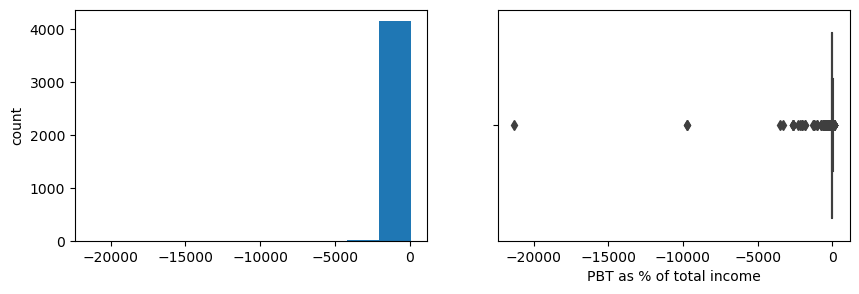

PAT as % of total income
Skew : -37.17


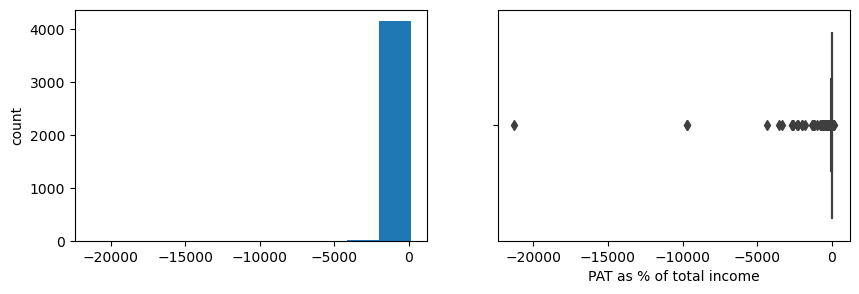

Cash profit as % of total income
Skew : -36.02


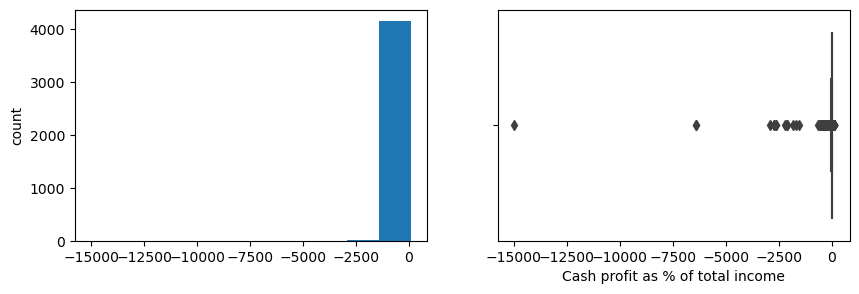

PAT as % of net worth
Skew : 17.76


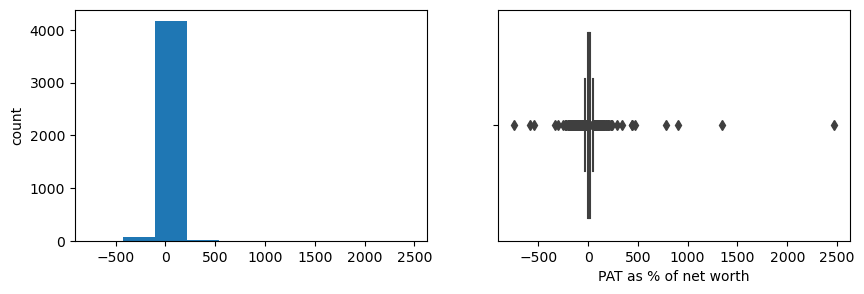

Sales
Skew : 31.23


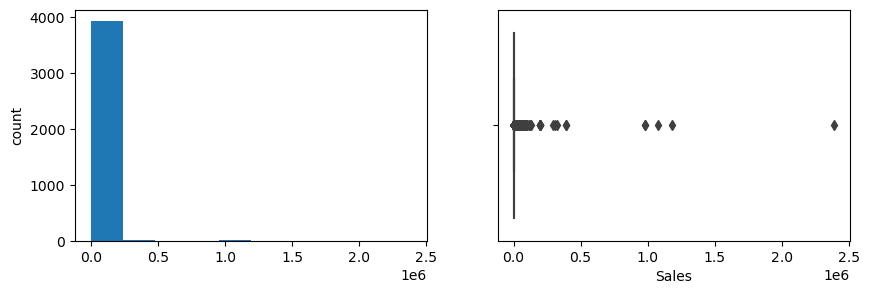

Income from fincial services
Skew : 40.46


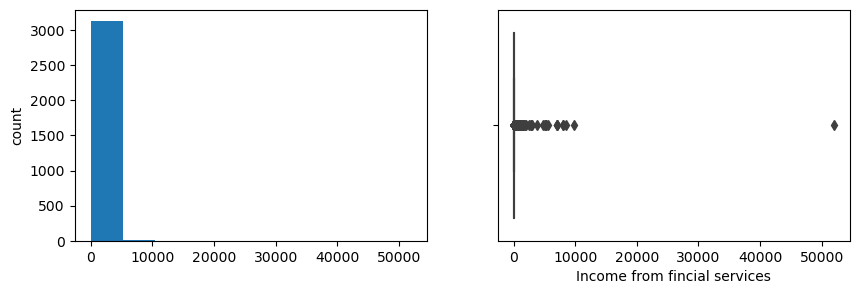

Other income
Skew : 35.59


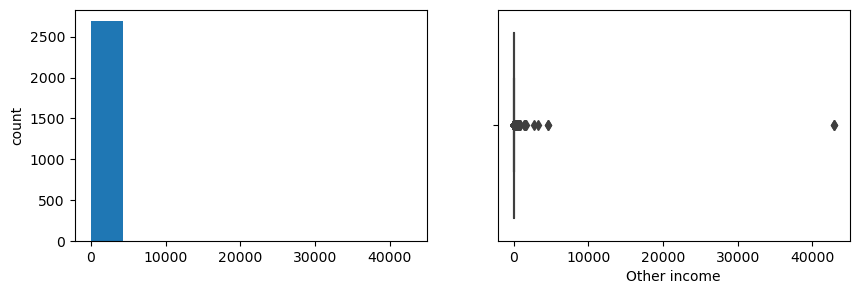

Total capital
Skew : 31.49


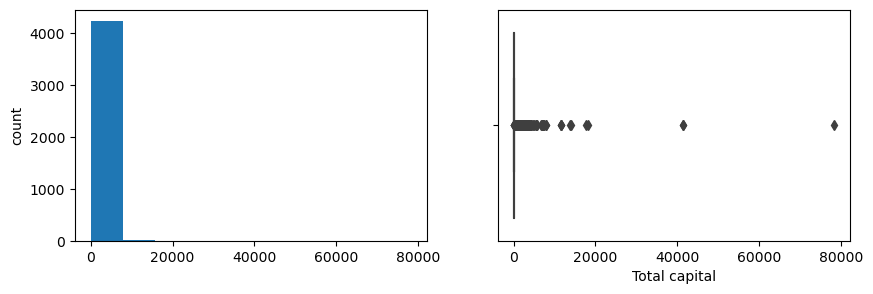

Reserves and funds
Skew : 34.11


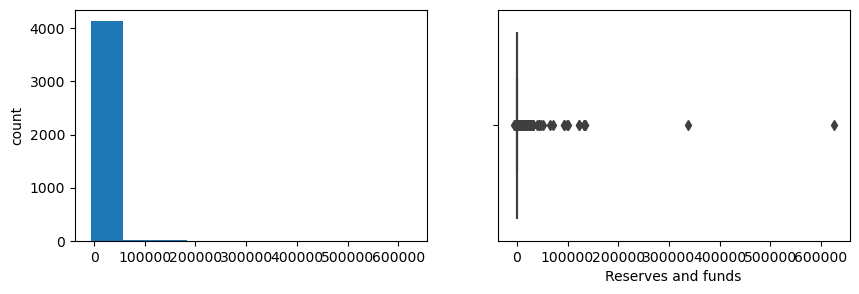

Borrowings
Skew : 20.89


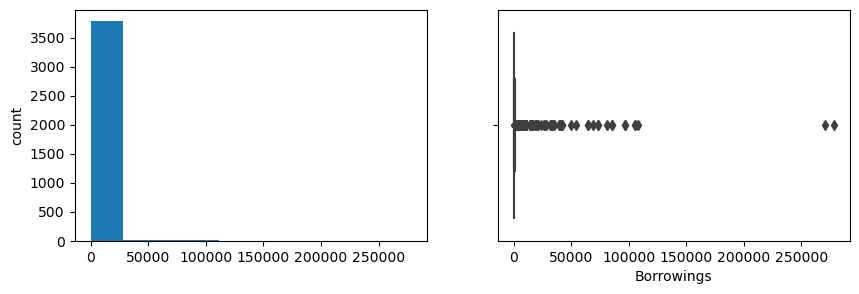

Current liabilities & provisions
Skew : 26.51


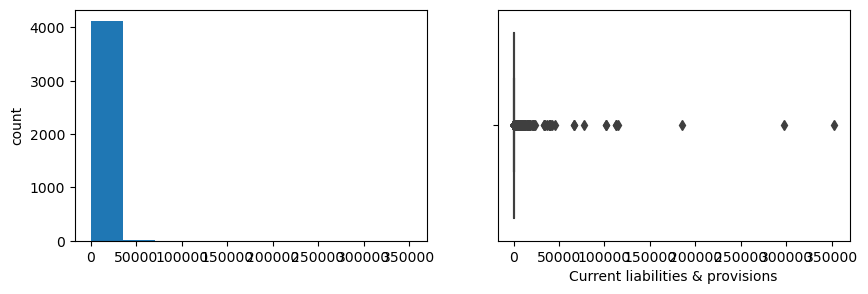

Deferred tax liability
Skew : 23.74


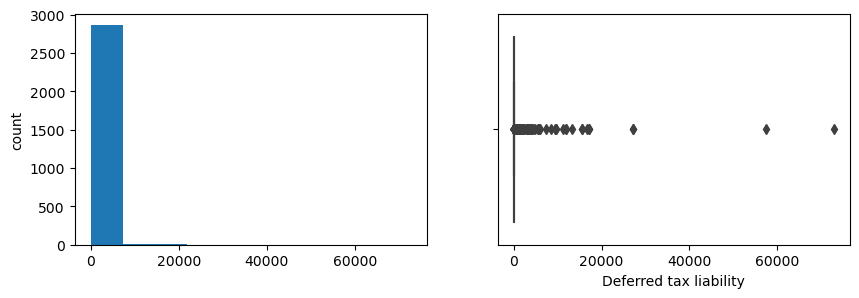

Shareholders funds
Skew : 31.55


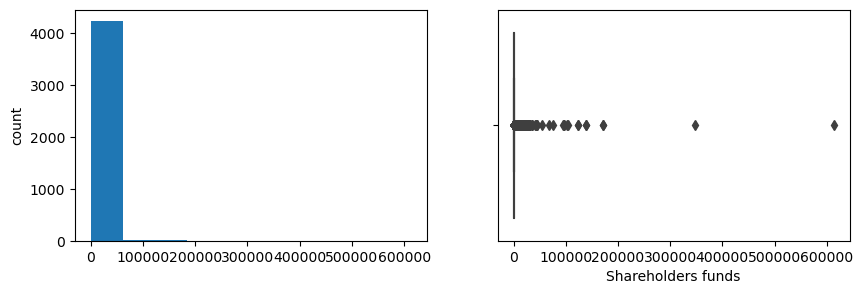

Cumulative retained profits
Skew : 27.82


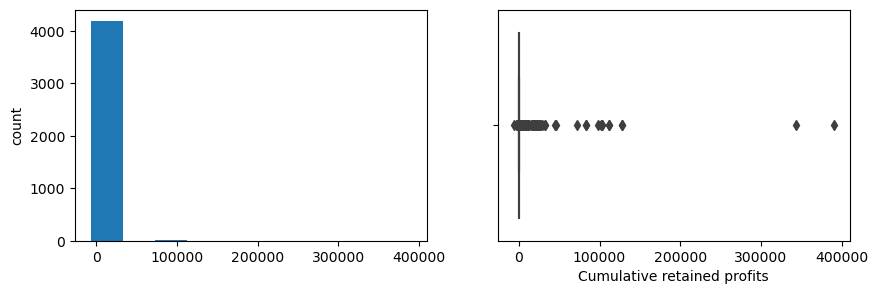

Capital employed
Skew : 28.28


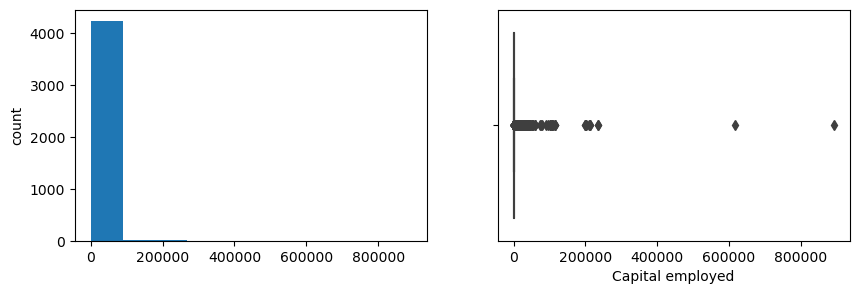

TOL/TNW
Skew : 8.89


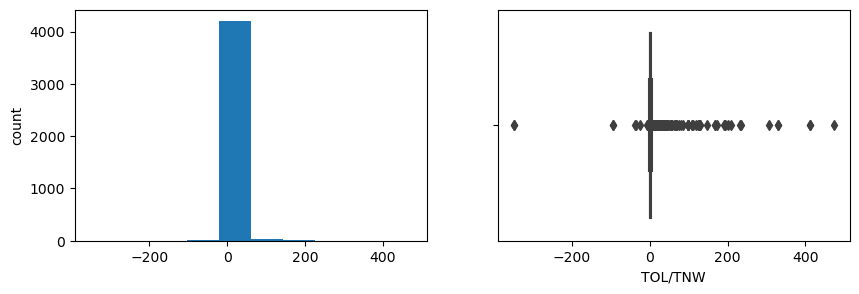

Total term liabilities / tangible net worth
Skew : 9.03


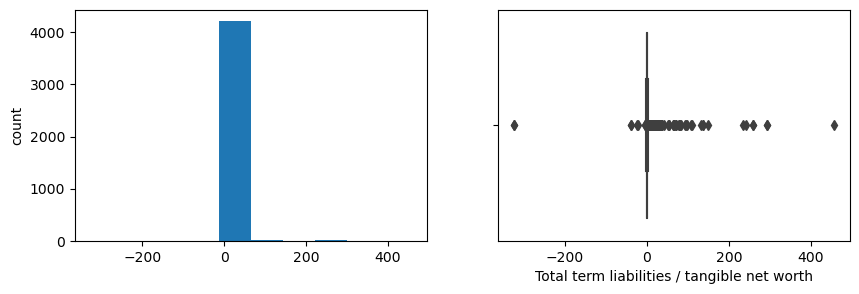

Contingent liabilities / Net worth (%)
Skew : 24.54


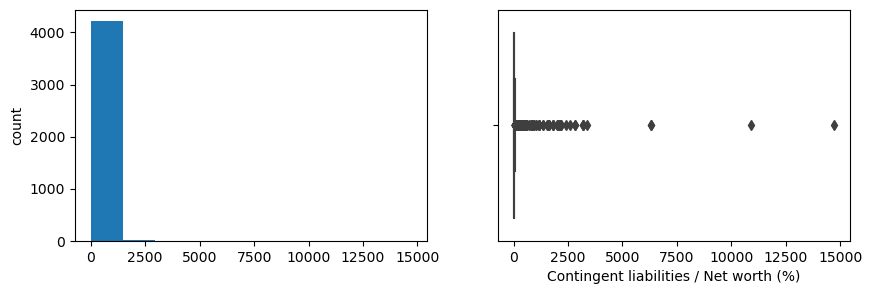

Contingent liabilities
Skew : 37.76


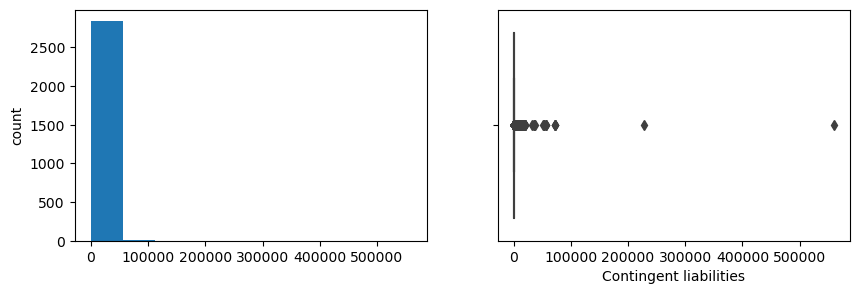

Net fixed assets
Skew : 37.62


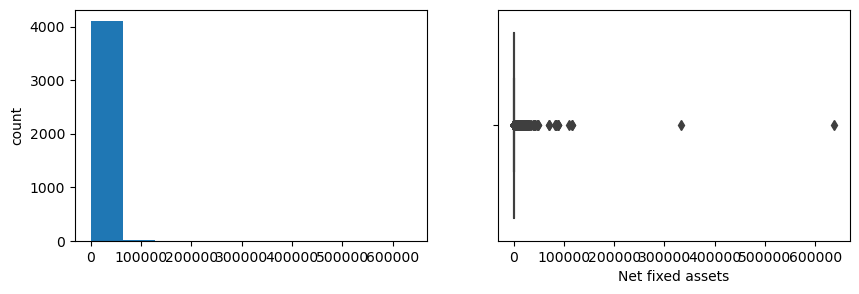

Investments
Skew : 19.44


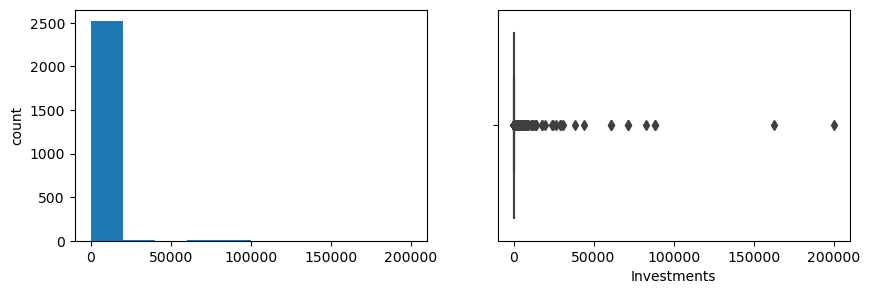

Current assets
Skew : 21.33


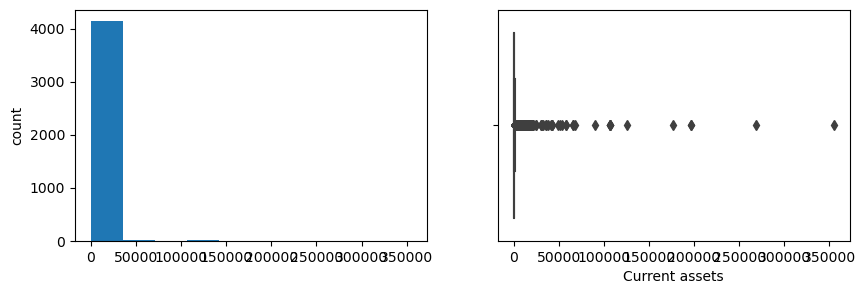

Net working capital
Skew : 8.84


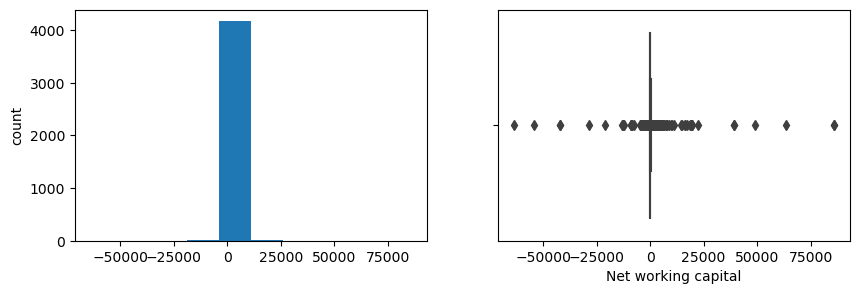

Quick ratio (times)
Skew : 27.43


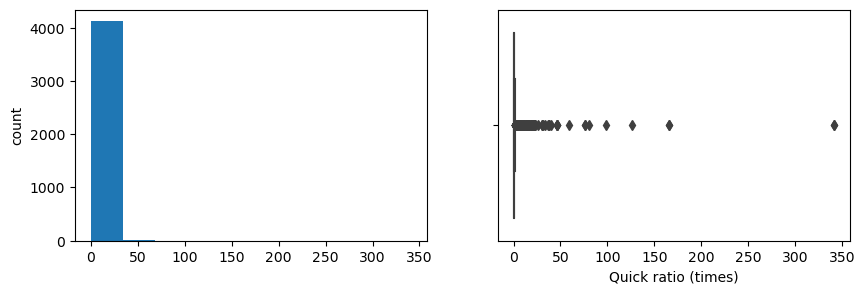

Current ratio (times)
Skew : 33.28


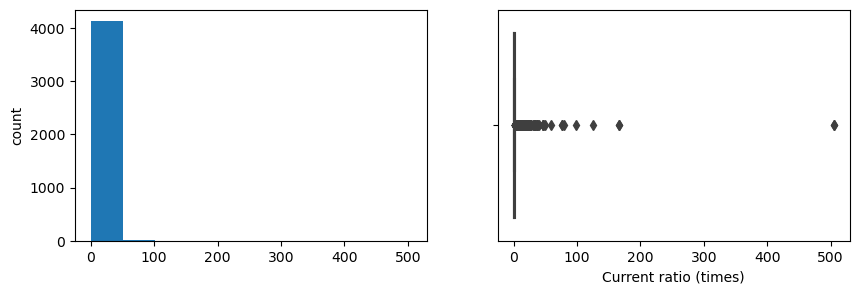

Debt to equity ratio (times)
Skew : 16.33


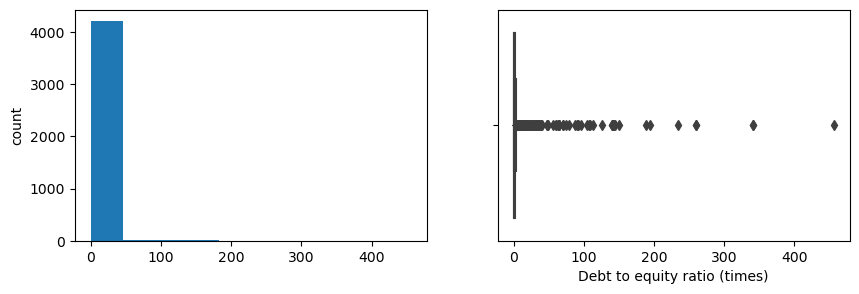

Cash to current liabilities (times)
Skew : 26.46


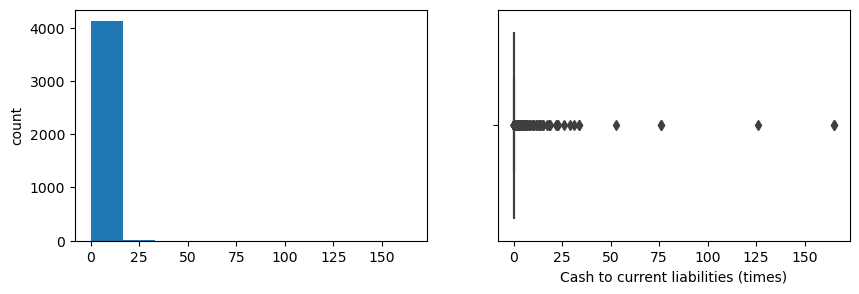

Cash to average cost of sales per day
Skew : 38.84


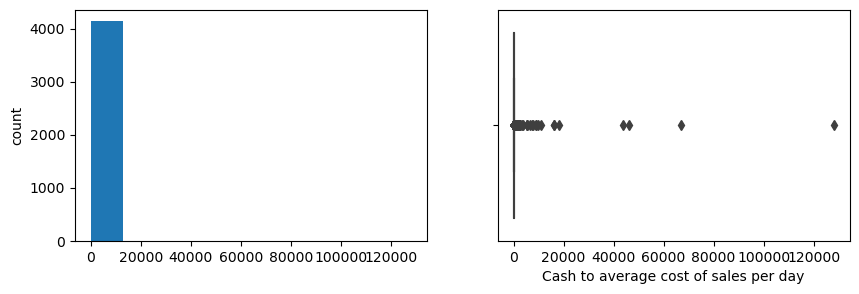

Creditors turnover
Skew : 19.72


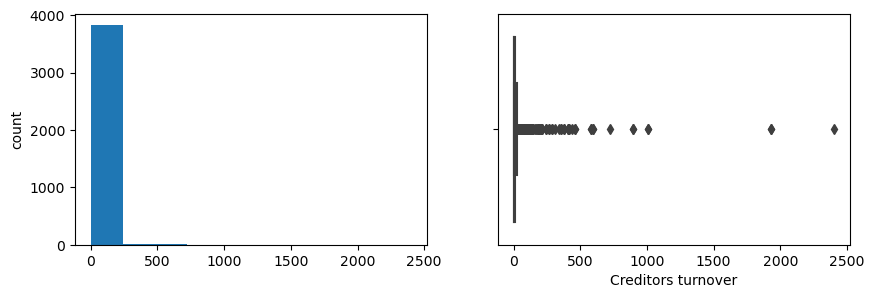

Debtors turnover
Skew : 22.91


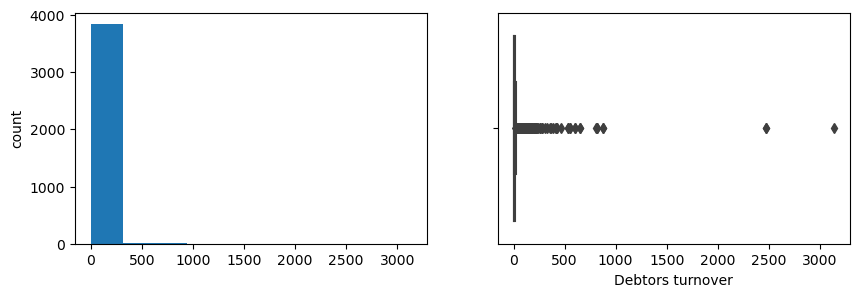

Finished goods turnover
Skew : 20.84


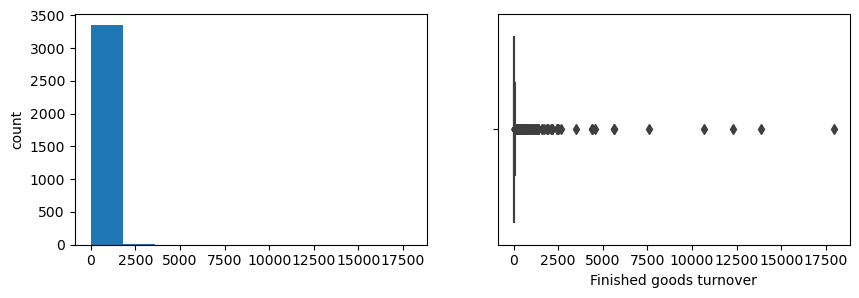

WIP turnover
Skew : 25.69


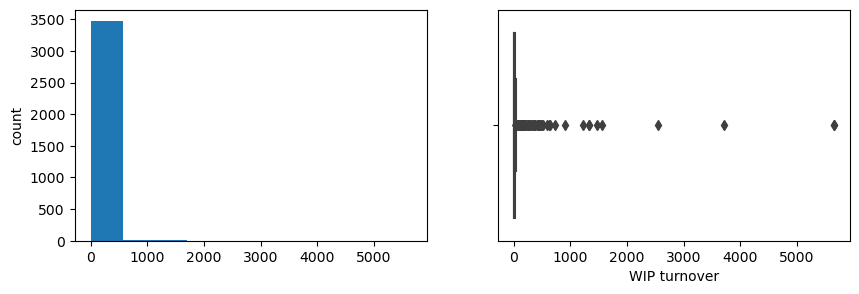

Raw material turnover
Skew : 60.61


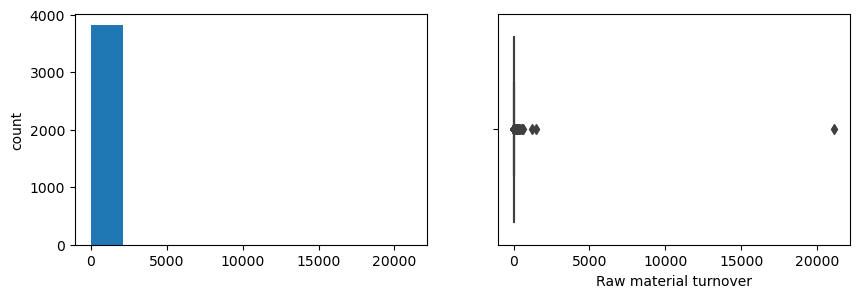

Shares outstanding
Skew : 11.03


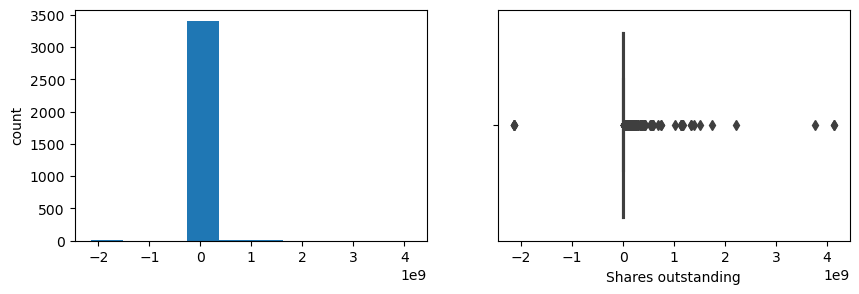

Equity face value
Skew : -29.19


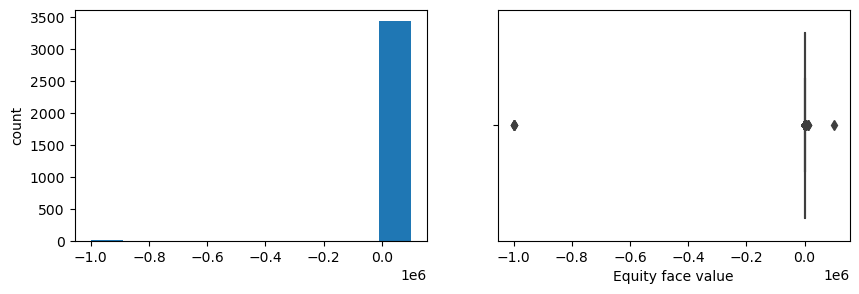

EPS
Skew : -63.29


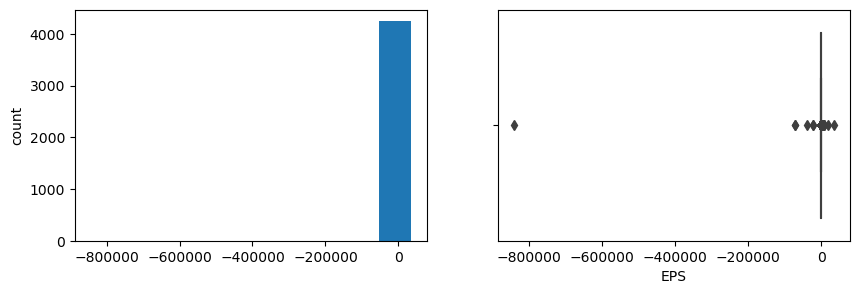

Adjusted EPS
Skew : -63.29


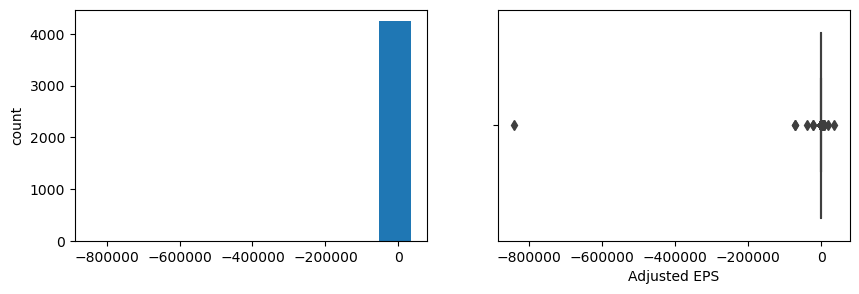

Total liabilities
Skew : 26.42


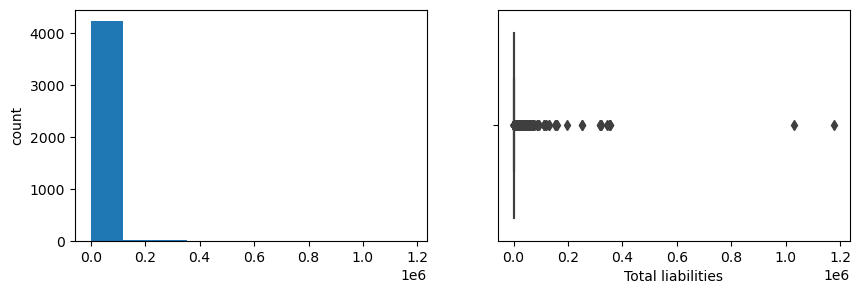

PE on BSE
Skew : 37.2


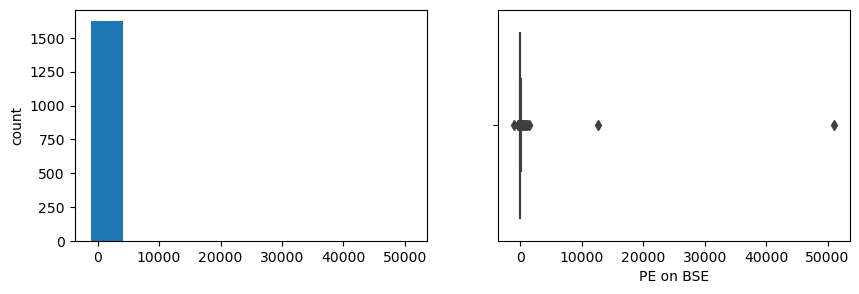

In [198]:
for col in df.columns:
    print(col)
    print('Skew :',round(df[col].skew(),2))
    plt.figure(figsize=(10,3))
    plt.subplot(1,2,1)
    df[col].hist(bins=10, grid=False)
    
    plt.ylabel('count')
    plt.subplot(1,2,2)
    sns.boxplot(x=df[col])
    plt.show()

In [199]:
# Pairplot using sns
df.columns

Index(['Num', 'Networth Next Year', 'Total assets', 'Net worth',
       'Total income', 'Change in stock', 'Total expenses', 'Profit after tax',
       'PBDITA', 'PBT', 'Cash profit', 'PBDITA as % of total income',
       'PBT as % of total income', 'PAT as % of total income',
       'Cash profit as % of total income', 'PAT as % of net worth', 'Sales',
       'Income from fincial services', 'Other income', 'Total capital',
       'Reserves and funds', 'Borrowings', 'Current liabilities & provisions',
       'Deferred tax liability', 'Shareholders funds',
       'Cumulative retained profits', 'Capital employed', 'TOL/TNW',
       'Total term liabilities / tangible net worth',
       'Contingent liabilities / Net worth (%)', 'Contingent liabilities',
       'Net fixed assets', 'Investments', 'Current assets',
       'Net working capital', 'Quick ratio (times)', 'Current ratio (times)',
       'Debt to equity ratio (times)', 'Cash to current liabilities (times)',
       'Cash to average c

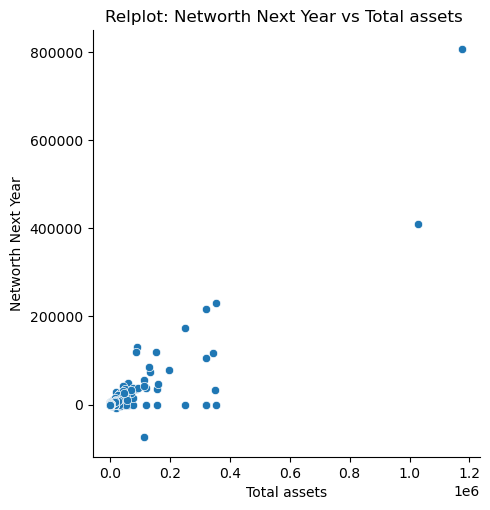

In [200]:
plt.figure.figsize=(8,8)
sns.relplot(data=df, y="Networth Next Year", x="Total assets")

plt.title("Relplot: Networth Next Year vs Total assets ")
plt.show();

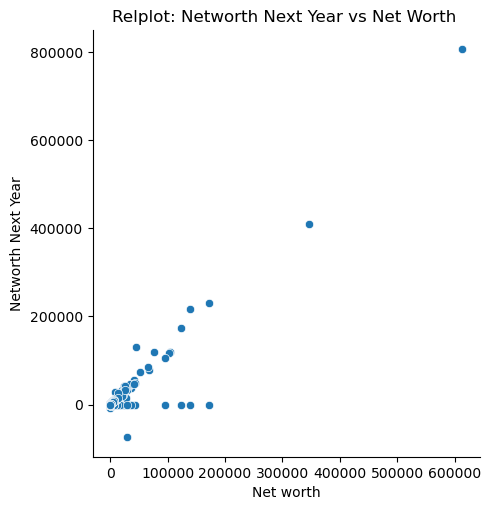

In [201]:
sns.relplot(data=df, y="Networth Next Year", x="Net worth")
plt.title("Relplot: Networth Next Year vs Net Worth ")
plt.show();

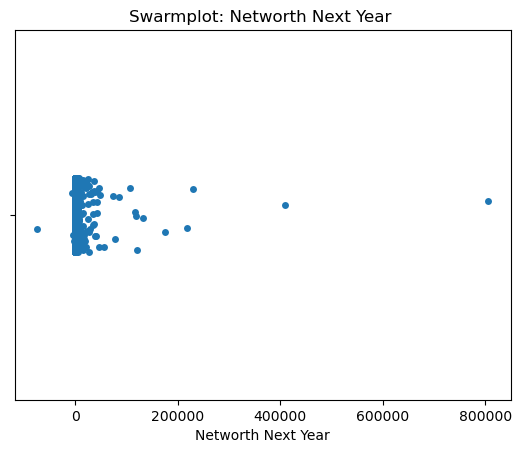

In [202]:

sns.stripplot(data=df, x="Networth Next Year")
plt.title("Swarmplot: Networth Next Year ")
plt.show();

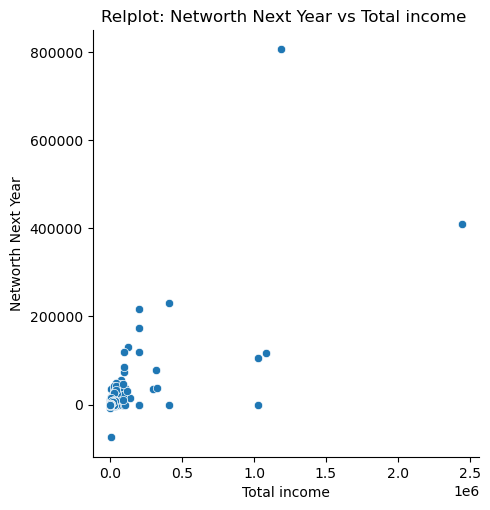

In [203]:
sns.relplot(df, y="Networth Next Year", x="Total income")

plt.title("Relplot: Networth Next Year vs Total income ")
plt.show();


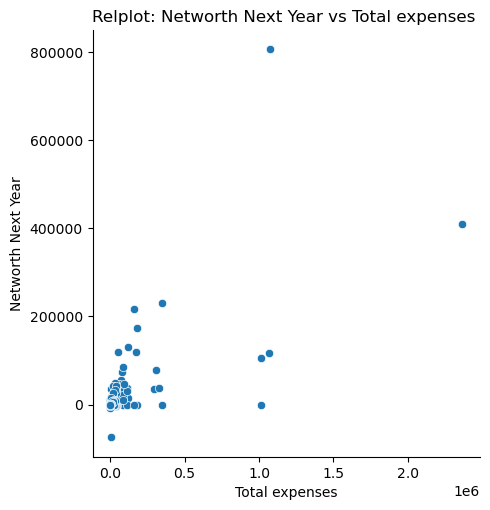

In [204]:
sns.relplot(df, y="Networth Next Year", x="Total expenses")


plt.title("Relplot: Networth Next Year vs Total expenses ")
plt.show();

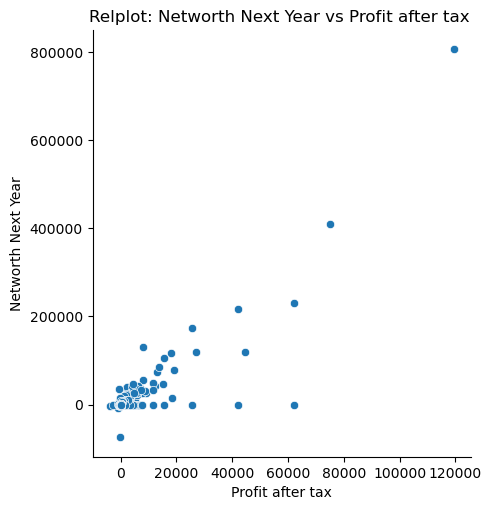

In [205]:
sns.relplot(df, y="Networth Next Year", x="Profit after tax")

plt.title("Relplot: Networth Next Year vs Profit after tax ")
plt.show();

<Figure size 500x1000 with 0 Axes>

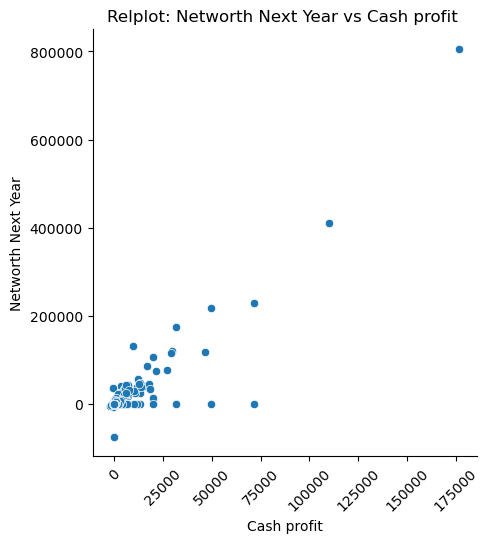

In [206]:
plt.figure(figsize=(5,10))
sns.relplot(df, y="Networth Next Year", x="Cash profit")


plt.title("Relplot: Networth Next Year vs Cash profit ")
plt.xticks(rotation=45)
plt.show();

<Figure size 500x1000 with 0 Axes>

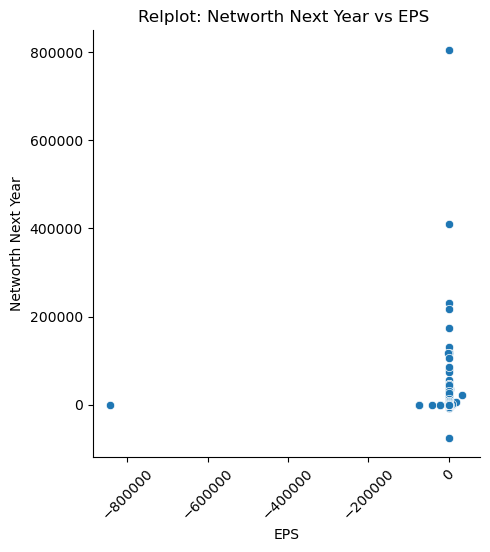

In [207]:
plt.figure(figsize=(5,10))
sns.relplot(df, y="Networth Next Year", x="EPS")


plt.title("Relplot: Networth Next Year vs EPS ")
plt.xticks(rotation=45)
plt.show();


'Profit after tax',
       'PBDITA', 'PBT', 'Cash profit', 'PBDITA as % of total income',
       'PBT as % of total income', 'PAT as % of total income',
       'Cash profit as % of total income', 'PAT as % of net worth', 'Sales',
       'Income from fincial services', 'Other income', 'Total capital',
       'Reserves and funds', 'Borrowings', 'Current liabilities & provisions',
       'Deferred tax liability', 'Shareholders funds',
       'Cumulative retained profits', 'Capital employed', 'TOL/TNW',
       'Total term liabilities / tangible net worth',
       'Contingent liabilities / Net worth (%)', 'Contingent liabilities',
       'Net fixed assets', 'Investments', 'Current assets',
       'Net working capital', 'Quick ratio (times)', 'Current ratio (times)',
       'Debt to equity ratio (times)', 'Cash to current liabilities (times)',
       'Cash to average cost of sales per day', 'Creditors turnover',
       'Debtors turnover', 'Finished goods turnover', 'WIP turnover',
       'Raw material turnover', 'Shares outstanding', 'Equity face value',
       'EPS', 'Adjusted EPS', 'Total liabilities', 'PE on BSE']

In [503]:
dfeda= df[['Profit after tax','PBDITA','PBT', 'Cash profit','Sales','Total capital','Reserves and funds', 'Borrowings', 'Current liabilities & provisions','Deferred tax liability']]

In [504]:
dfeda.corr()

Profit after tax    PBDITA       PBT  \
Profit after tax                          1.000000  0.990417  0.995142   
PBDITA                                    0.990417  1.000000  0.988875   
PBT                                       0.995142  0.988875  1.000000   
Cash profit                               0.990290  0.991634  0.977955   
Sales                                     0.729793  0.795414  0.729000   
Total capital                             0.485572  0.500089  0.518158   
Reserves and funds                        0.939000  0.945006  0.910684   
Borrowings                                0.771153  0.825291  0.755756   
Current liabilities & provisions          0.741344  0.793694  0.749743   
Deferred tax liability                    0.928427  0.959768  0.916677   

                                  Cash profit     Sales  Total capital  \
Profit after tax                     0.990290  0.729793       0.485572   
PBDITA                               0.991634  0.795414       0.500089   
PBT                                  0.977955  0.729000       0.518158   
Cash profit                          1.000000  0.765923       0.466547   
Sales                                0.765923  1.000000       0.309134   
Total capital                        0.466547  0.309134       1.000000   
Reserves and funds                   0.968124  0.779759       0.347768   
Borrowings                           0.816983  0.837026       0.351985   
Current liabilities & provisions     0.763801  0.830291       0.369314   
Deferred tax liability               0.961215  0.851163       0.442942   

                                  Reserves and funds  Borrowings  \
Profit after tax                            0.939000    0.771153   
PBDITA                                      0.945006    0.825291   
PBT                                         0.910684    0.755756   
Cash profit                                 0.968124    0.816983   
Sales                                       0.779759    0.837026   
Total capital                               0.347768    0.351985   
Reserves and funds                          1.000000    0.865125   
Borrowings                                  0.865125    1.000000   
Current liabilities & provisions            0.739594    0.748986   
Deferred tax liability                      0.955633    0.895888   

                                  Current liabilities & provisions  \
Profit after tax                                          0.741344   
PBDITA                                                    0.793694   
PBT                                                       0.749743   
Cash profit                                               0.763801   
Sales                                                     0.830291   
Total capital                                             0.369314   
Reserves and funds                                        0.739594   
Borrowings                                                0.748986   
Current liabilities & provisions                          1.000000   
Deferred tax liability                                    0.832727   

                                  Deferred tax liability  
Profit after tax                                0.928427  
PBDITA                                          0.959768  
PBT                                             0.916677  
Cash profit                                     0.961215  
Sales                                           0.851163  
Total capital                                   0.442942  
Reserves and funds                              0.955633  
Borrowings                                      0.895888  
Current liabilities & provisions                0.832727  
Deferred tax liability                          1.000000

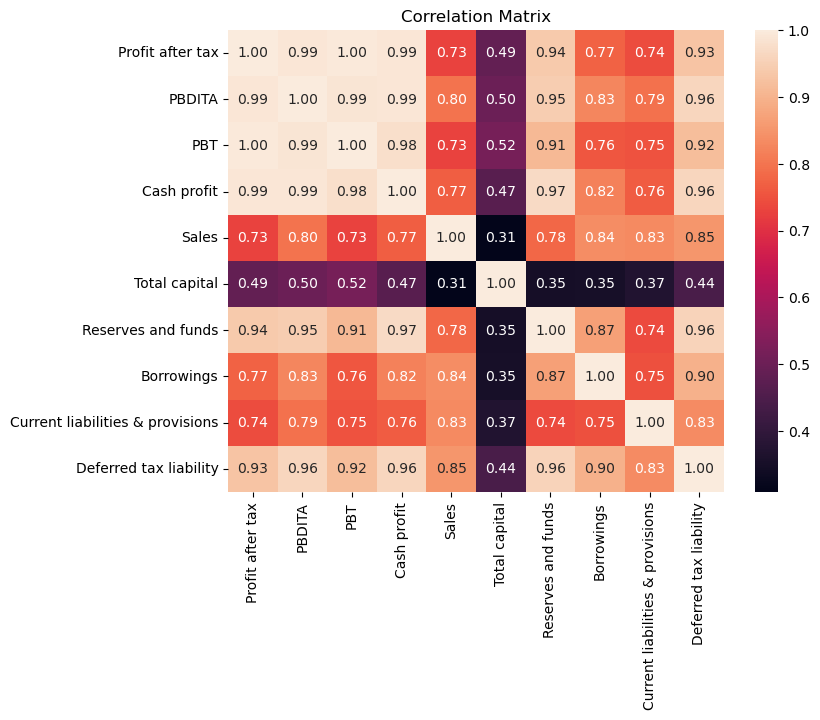

In [347]:
#check for presence of correlations
plt.figure(figsize=(8,6))
plt.xticks(rotation=45)
plt.title("Correlation Matrix")

sns.heatmap(dfeda.corr(), annot=True, fmt='.2f');

#check for presence of correlations
plt.figure(figsize=(8,6))
plt.title('Pairplot')
sns.pairplot(dfeda);

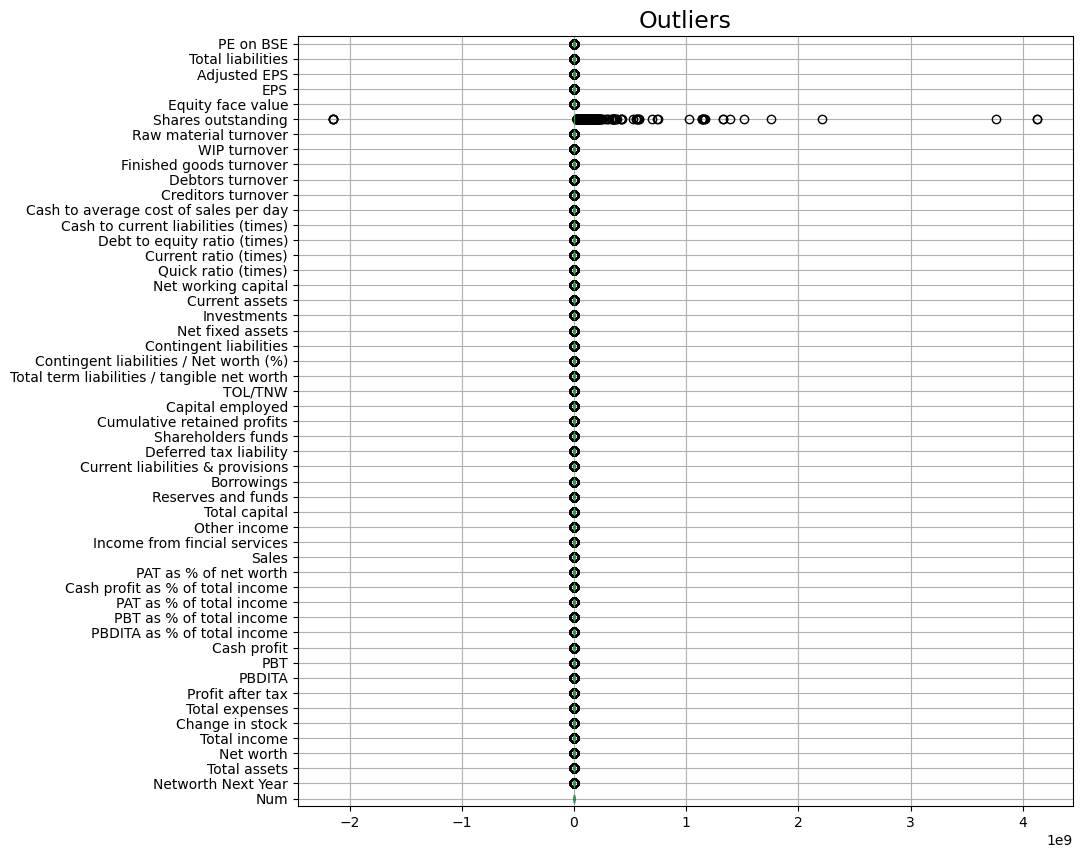

In [505]:
# Checking for outliers
# construct box plot for continuous variables
cont=df.dtypes.index
plt.figure(figsize=(10,10))
df[cont].boxplot(vert=0)
plt.title('Outliers',fontsize=17)
plt.show()

In [208]:
# Treating missing values

# imputing missing values
for column in df.columns:
    if df[column].dtype != 'object':
        mean = df[column].mean()
        df[column] = df[column].fillna(mean)    
        
df.isnull().sum()  

Num                                            0
Networth Next Year                             0
Total assets                                   0
Net worth                                      0
Total income                                   0
Change in stock                                0
Total expenses                                 0
Profit after tax                               0
PBDITA                                         0
PBT                                            0
Cash profit                                    0
PBDITA as % of total income                    0
PBT as % of total income                       0
PAT as % of total income                       0
Cash profit as % of total income               0
PAT as % of net worth                          0
Sales                                          0
Income from fincial services                   0
Other income                                   0
Total capital                                  0
Reserves and funds  

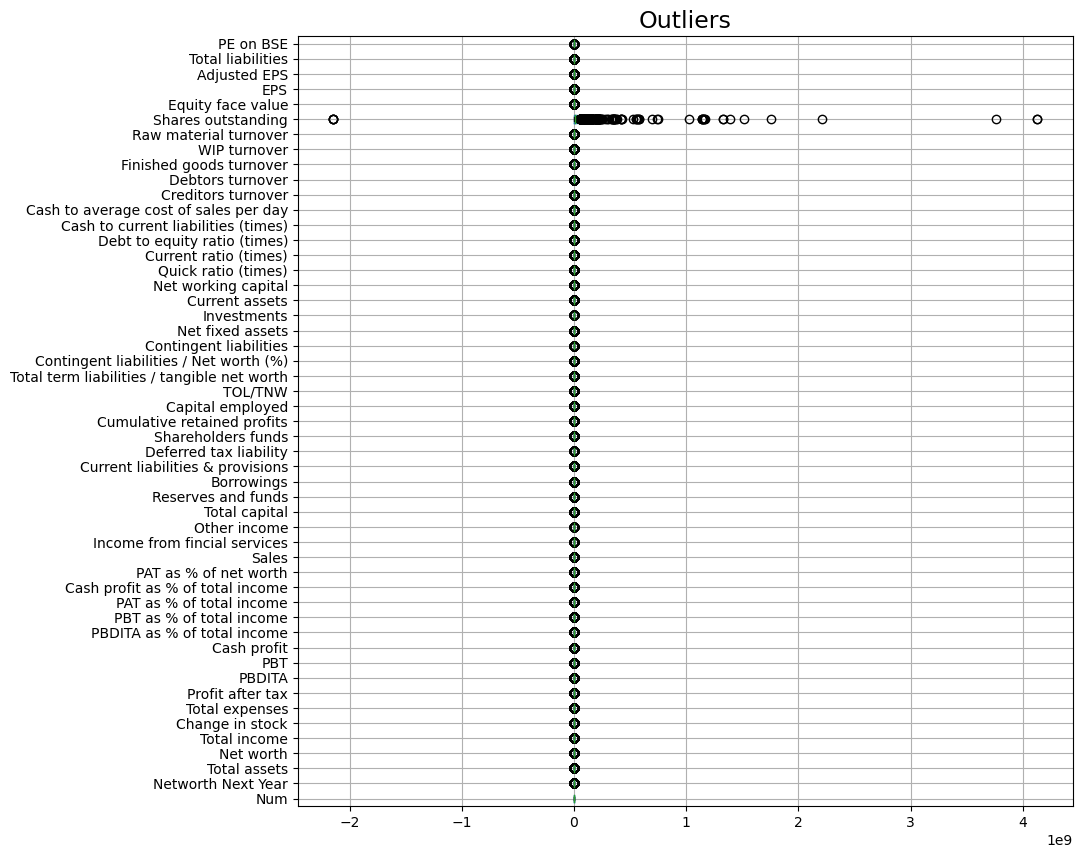

In [209]:
# Checking for outliers
# construct box plot for continuous variables
cont=df.dtypes.index
plt.figure(figsize=(10,10))
df[cont].boxplot(vert=0)
plt.title('Outliers',fontsize=17)
plt.show()

plt.figure(figsize=(15,25))
plt.title("Boxplot Financial Data")

feature_list = df.columns
for i in range (len(feature_list)):
    plt.subplot(5,5,i+1)
    
    sns.displot(y=df[feature_list[i]], data=df)
    plt.title("Histplot of {}".format(feature_list[i]))
    plt.tight_layout()
    
import warnings  
warnings.filterwarnings("ignore");

<Axes: xlabel='Count', ylabel='Total liabilities'>

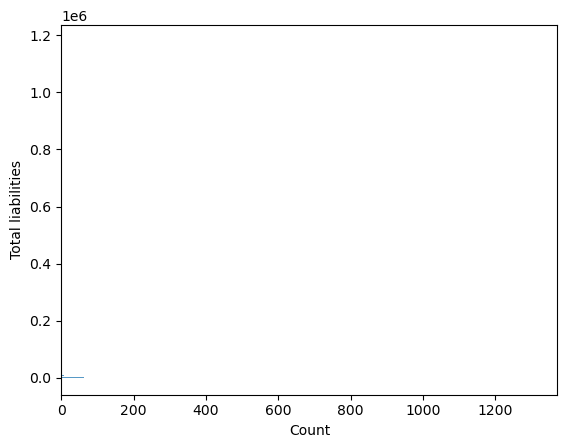

In [210]:
sns.histplot(y=df['Total liabilities'], data=df)

#Removing outliers
#define function that returns upper an dlower limit to detect outliers for each feature
def remove_outliers(col):
    q1,q3 =col.quantile([0.25,0.75])
    IQR =q3-q1
    lower_range =q1-(1.5*IQR)
    upper_range = q3 + (1.5*IQR)
    
    return lower_range, upper_range
#cap and floor the values beyond the outlier boundaries
for i in feature_list:
    LL, UL =remove_outliers(df[i])
    df[i]=np.where(df[i]>UL,UL,df[i])
    df[i]=np.where(df[i]<LL,LL,df[i])
    
    
 #WHEN WE ARE DOING OUTLIER TREATMENT WE SEE THAT THE CUFUSION MATRIX IS UNABLE TO PREDICT FN & TN VALUES. SO WE WILL NOT DO ANY OUTLIER TREATMENT.

In [211]:
from scipy.stats import zscore
df_scaled =df.apply(zscore)

In [212]:
df_scaled.describe()

Num  Networth Next Year  Total assets     Net worth  \
count  4.256000e+03        4.256000e+03  4.256000e+03  4.256000e+03   
mean   5.342427e-17       -1.043443e-17  1.168656e-17 -5.008525e-18   
std    1.000118e+00        1.000118e+00  1.000118e+00  1.000118e+00   
min   -1.731644e+00       -4.744961e+00 -1.188363e-01 -1.043188e-01   
25%   -8.658219e-01       -8.414037e-02 -1.158035e-01 -1.018901e-01   
50%    0.000000e+00       -7.986515e-02 -1.083478e-01 -9.623225e-02   
75%    8.658219e-01       -6.362875e-02 -8.156777e-02 -7.423729e-02   
max    1.731644e+00        5.048228e+01  3.900566e+01  4.720753e+01   

       Total income  Change in stock  Total expenses  Profit after tax  \
count  4.256000e+03     4.256000e+03    4.256000e+03      4.256000e+03   
mean  -1.043443e-17     1.669508e-17   -4.173771e-18      1.627771e-17   
std    1.000118e+00     1.000118e+00    1.000118e+00      1.000118e+00   
min   -8.942019e-02    -7.538531e+00   -8.646096e-02     -1.390320e+00   
25%   -8.710849e-02    -1.089223e-01   -8.437257e-02     -9.739383e-02   
50%   -7.950007e-02    -9.677965e-02   -7.710614e-02     -9.418541e-02   
75%   -5.280479e-02     1.743010e-17   -5.291081e-02     -7.554683e-02   
max    4.650387e+01     3.469080e+01    4.687195e+01      3.940863e+01   

             PBDITA           PBT  ...  Debtors turnover  \
count  4.256000e+03  4.256000e+03  ...      4.256000e+03   
mean  -1.878197e-17 -7.304099e-18  ...      1.836459e-17   
std    1.000118e+00  1.000118e+00  ...      1.000118e+00   
min   -1.888404e-01 -1.039893e+00  ...     -2.085292e-01   
25%   -1.080099e-01 -9.885709e-02  ...     -1.609592e-01   
50%   -1.017672e-01 -9.562031e-02  ...     -1.254852e-01   
75%   -7.466730e-02 -7.648340e-02  ...     -2.546018e-02   
max    3.752314e+01  3.499653e+01  ...      3.625639e+01   

       Finished goods turnover  WIP turnover  Raw material turnover  \
count             4.256000e+03  4.256000e+03           4.256000e+03   
mean              1.252131e-17 -9.182296e-18          -1.669508e-18   
std               1.000118e+00  1.000118e+00           1.000118e+00   
min              -1.684227e-01 -1.878598e-01          -6.065011e-02   
25%              -1.479831e-01 -1.479638e-01          -4.393854e-02   
50%              -1.171142e-01 -1.007783e-01          -3.200609e-02   
75%               2.833804e-17 -2.312224e-17          -4.130414e-03   
max               3.562129e+01  3.659450e+01           6.476951e+01   

       Shares outstanding  Equity face value           EPS  Adjusted EPS  \
count        4.256000e+03       4.256000e+03  4.256000e+03   4256.000000   
mean        -5.008525e-18       1.669508e-18  1.168656e-17      0.000000   
std          1.000118e+00       1.000118e+00  1.000118e+00      1.000118   
min         -1.411474e+01      -3.255804e+01 -6.454507e+01    -64.545085   
25%         -1.401117e-01       3.601052e-02  1.502383e-02      0.015124   
50%         -1.135489e-01       3.601052e-02  1.513791e-02      0.015219   
75%          0.000000e+00       3.601052e-02  1.578950e-02      0.015707   
max          2.669620e+01       3.295061e+00  2.658318e+00      2.658423   

       Total liabilities     PE on BSE  
count       4.256000e+03  4.256000e+03  
mean        1.168656e-17  3.339017e-18  
std         1.000118e+00  1.000118e+00  
min        -1.188363e-01 -1.452825e+00  
25%        -1.158035e-01 -5.264455e-02  
50%        -1.083478e-01  8.807202e-18  
75%        -8.156777e-02  8.807202e-18  
max         3.900566e+01  6.314933e+01  

[8 rows x 51 columns]

# Univariate Analysis

In [511]:
#Check for presence of outliers in each feature
df_num=df.select_dtypes(include= ['float', 'int64'])
df

Num  Networth Next Year  Total assets  Net worth  Total income  \
0        1               395.3         827.6      336.5    534.100000   
1        2                36.2          67.7       24.3    137.900000   
2        3                84.0         238.4       78.9    331.200000   
3        4              2041.4        6883.5     1443.3   8448.500000   
4        5                41.8          90.9       47.0    388.600000   
...    ...                 ...           ...        ...           ...   
4251  4252                 0.2           0.4        0.2   4688.189789   
4252  4253                93.3         159.6       86.7    172.900000   
4253  4254               932.2         833.8      664.6   2314.700000   
4254  4255                64.6          95.0       48.5    110.500000   
4255  4256                 0.0         384.6      111.3    345.800000   

      Change in stock  Total expenses  Profit after tax      PBDITA  \
0           13.500000        508.7000         38.900000  124.400000   
1           -3.700000        131.0000          3.200000    5.500000   
2          -18.100000        309.2000          3.900000   25.800000   
3          212.200000       8482.4000        178.300000  418.400000   
4            3.400000        392.7000         -0.700000    7.200000   
...               ...             ...               ...         ...   
4251        43.702482       4356.3011        295.050585  605.940639   
4252         0.100000        169.7000          3.300000   18.400000   
4253        32.100000       2151.6000        195.200000  348.400000   
4254         4.600000        113.5000          1.600000    9.700000   
4255        11.300000        341.7000         15.400000   57.600000   

             PBT  ...  Debtors turnover  Finished goods turnover  \
0      64.600000  ...          5.650000                 3.990000   
1       1.000000  ...         17.929029                84.369988   
2      10.500000  ...          2.510000                17.670000   
3     185.100000  ...          1.910000                18.140000   
4      -0.600000  ...         68.000000                45.870000   
...          ...  ...               ...                      ...   
4251  410.259044  ...          0.000000                84.369988   
4252    3.700000  ...          1.800000                11.000000   
4253  303.000000  ...          6.080000                59.280000   
4254    2.600000  ...          3.710000                78.990000   
4255   20.700000  ...          4.710000                53.370000   

      WIP turnover  Raw material turnover  Shares outstanding  \
0         3.370000              14.870000        8.760056e+06   
1        28.684513              17.733926        2.376491e+07   
2         8.760000               8.350000        2.376491e+07   
3        18.620000              11.110000        1.000000e+07   
4        28.670000              19.930000        1.073150e+05   
...            ...                    ...                 ...   
4251     28.684513               0.000000        2.376491e+07   
4252      8.280000               9.880000        8.162700e+06   
4253     31.140000               9.870000        7.479762e+06   
4254     11.510000              14.950000        2.376491e+07   
4255      8.330000               3.740000        9.600000e+05   

      Equity face value    EPS  Adjusted EPS  Total liabilities  PE on BSE  
0             10.000000   4.44          4.44              827.6   55.46229  
1          -1094.828671   0.00          0.00               67.7   55.46229  
2          -1094.828671   0.00          0.00              238.4   55.46229  
3             10.000000  17.60         17.60             6883.5   55.46229  
4            100.000000  -6.52         -6.52               90.9   55.46229  
...                 ...    ...           ...                ...        ...  
4251       -1094.828671   0.00          0.00                0.4   55.46229  
4252          10.000000   0.42          0.42              159.6

ValueError: num must be an integer with 1 <= num <= 25, not 26

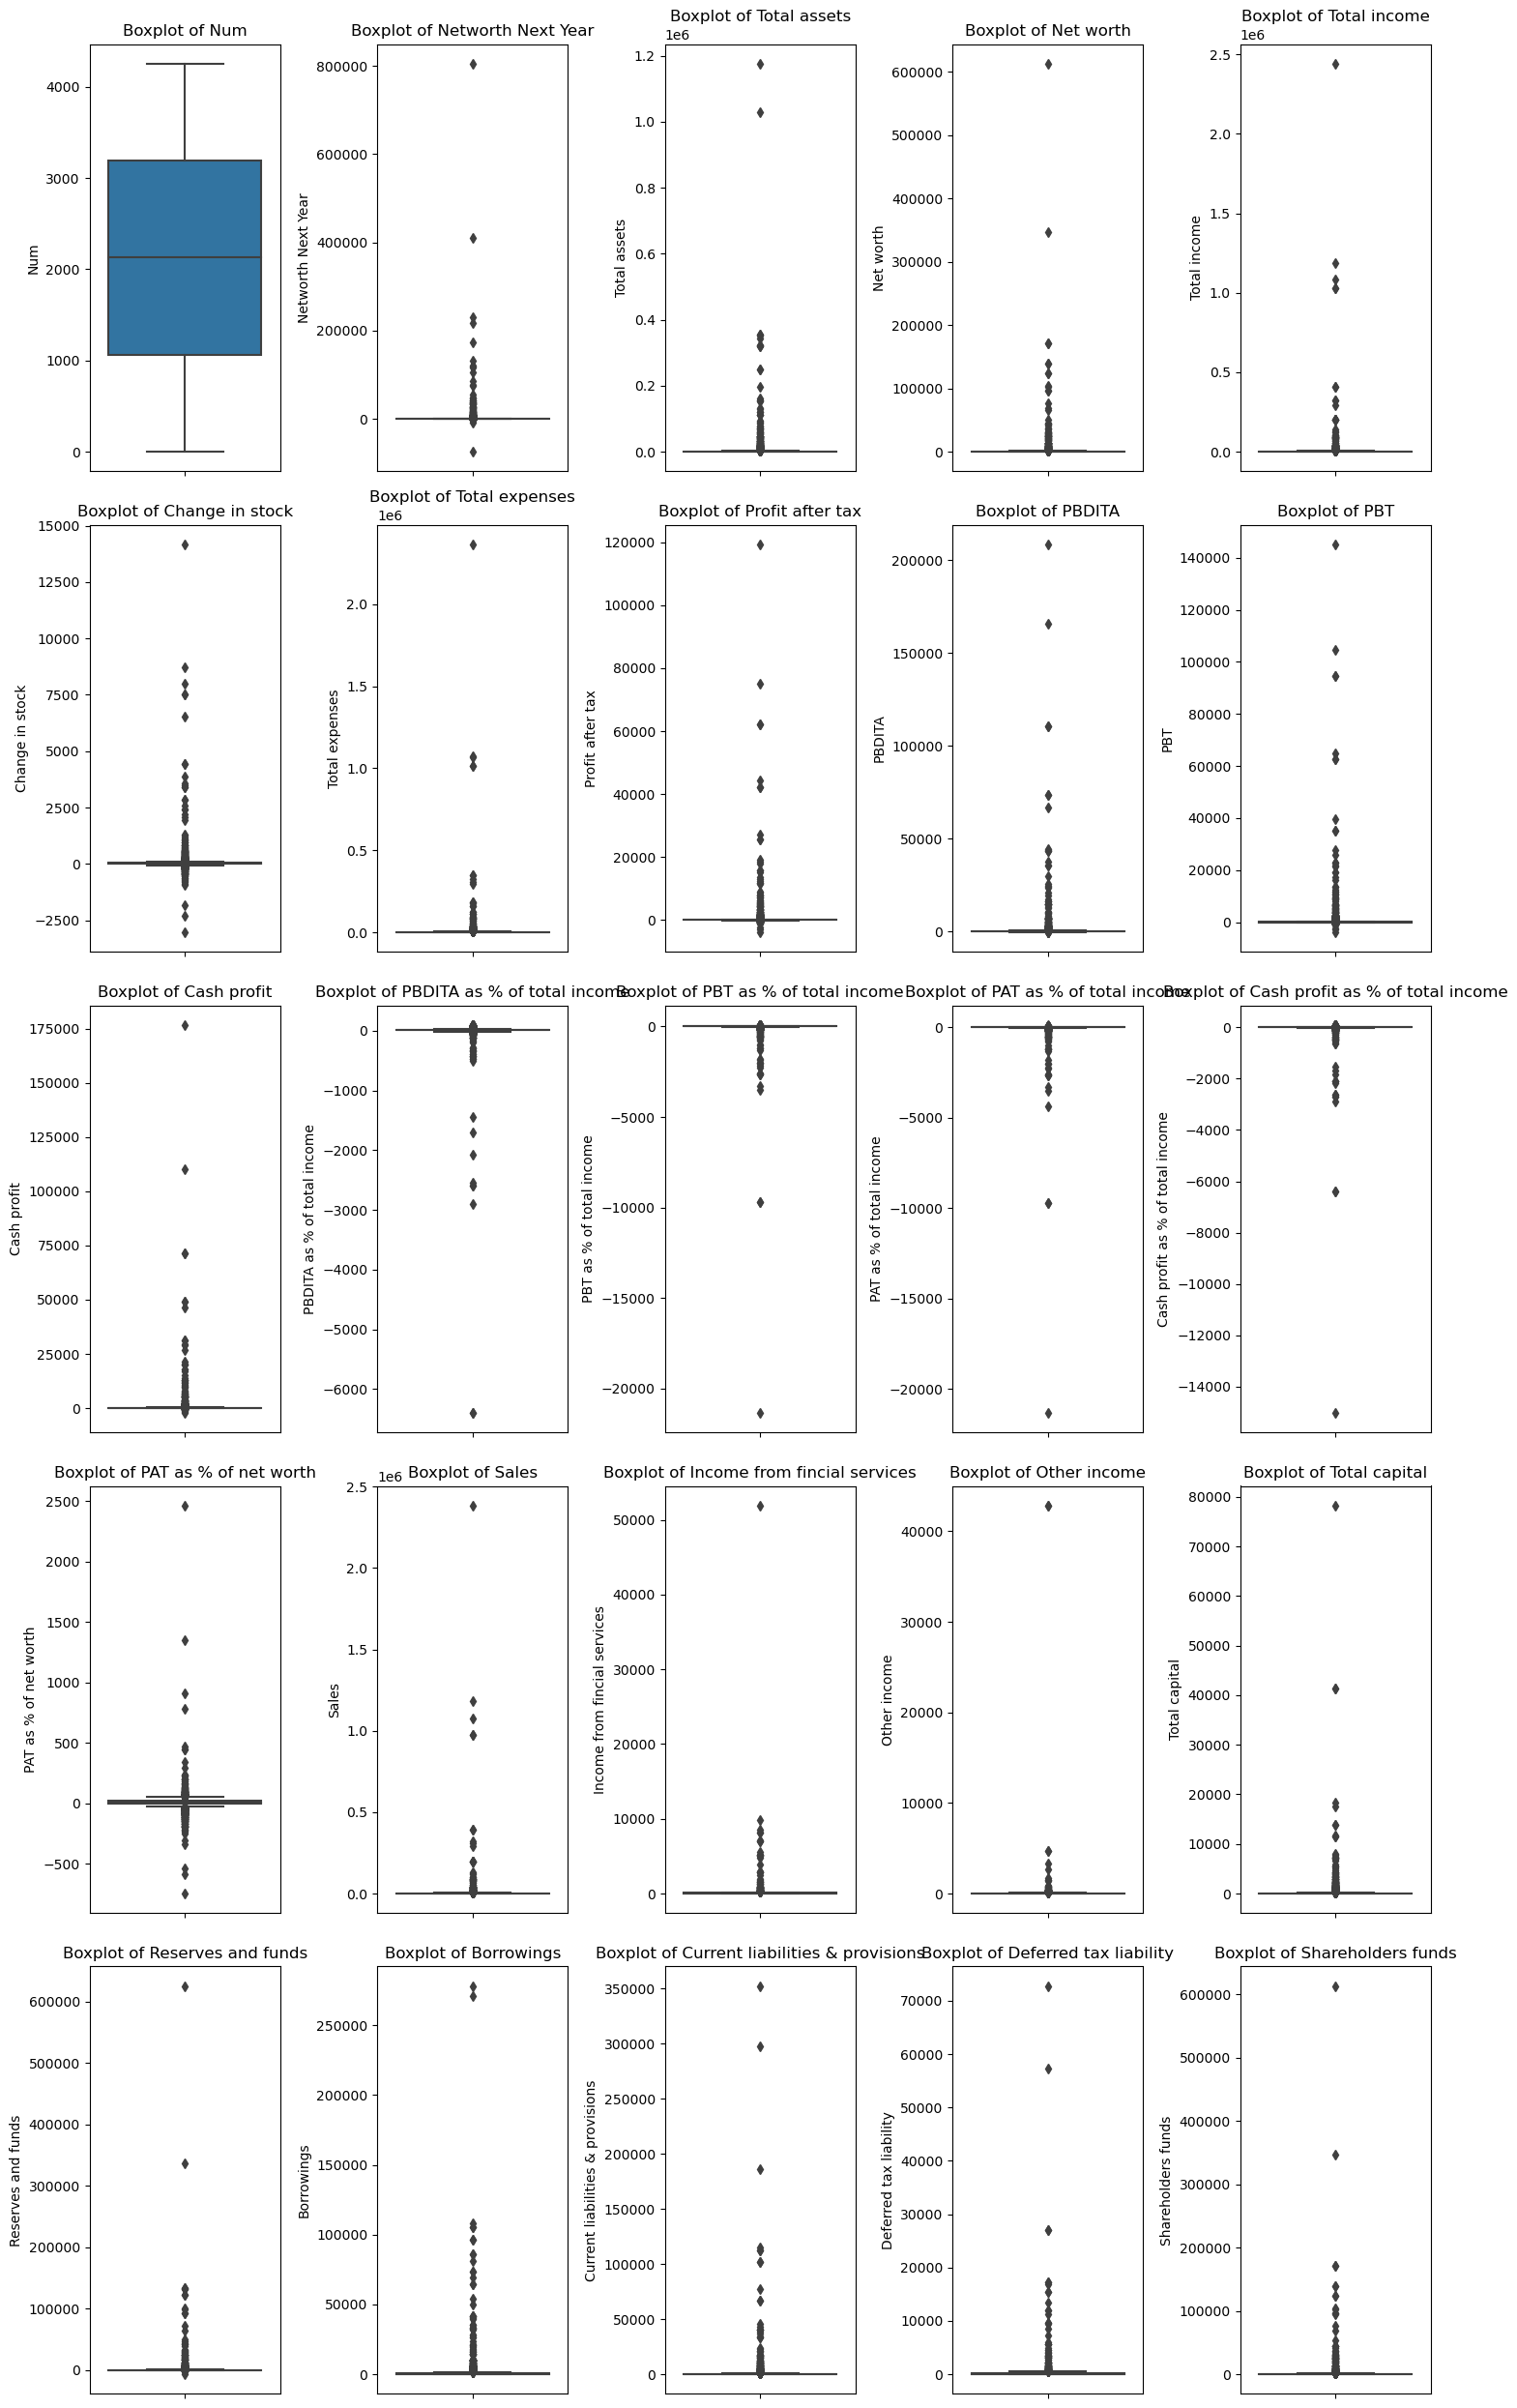

In [512]:
#Creating boxplot for all possible variables

plt.figure(figsize=(15,25))
plt.title("Boxplot Financial Data")

feature_list = df_num.columns
for i in range (len(feature_list)):
    plt.subplot(5,5,i+1)
    sns.boxplot(y=df_num[feature_list[i]], data = df_num)
    plt.title("Boxplot of {}".format(feature_list[i]))
    plt.tight_layout()
    
import warnings  
warnings.filterwarnings("ignore");

In [ ]:
df_num.corr()

In [ ]:
#check for presence of correlations
plt.figure(figsize=(8,6))
plt.title("Correlation Matrix")
sns.heatmap(df_num.corr(), annot=True, fmt='.2f');

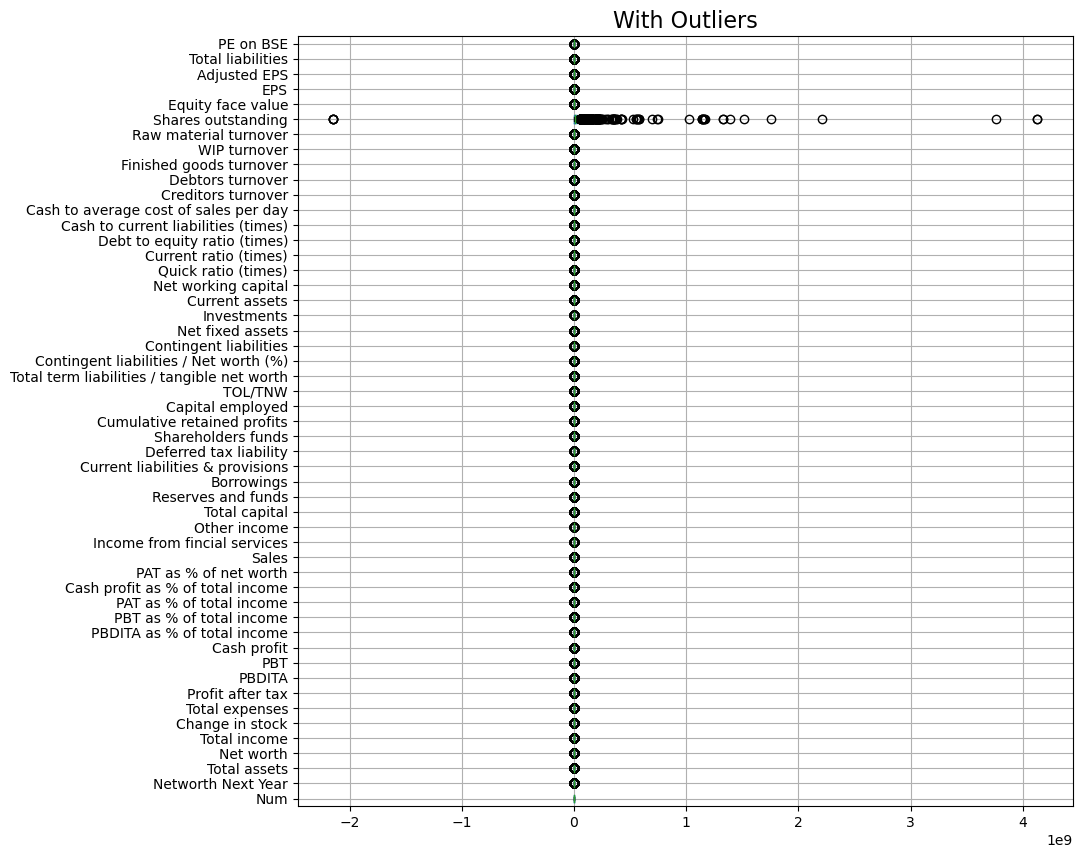

In [361]:
# construct box plot for continuous variables
cont=df.dtypes[(df.dtypes!='uint8') & (df.dtypes!='bool')].index
plt.figure(figsize=(10,10))
df[cont].boxplot(vert=0)
plt.title('With Outliers',fontsize=16)
plt.show()

shares outstanding have lot of outliers which can influcence the analysis

# Lostic Regression Model Building

# Selecting Target variable
The task is to analyze the data provided and develop a predictive model leveraging machine learning techniques to identify whether a given company will be tagged as a defaulter in terms of net worth next year. 


A company will not be tagged as a defaulter if its net worth next year is positive, or else, it'll be tagged as a defaulter.


In [213]:
#We will add target variable as Default


df['Default']=np.where(df['Networth Next Year']>0,0,1)
df

Num  Networth Next Year  Total assets  Net worth  Total income  \
0        1               395.3         827.6      336.5    534.100000   
1        2                36.2          67.7       24.3    137.900000   
2        3                84.0         238.4       78.9    331.200000   
3        4              2041.4        6883.5     1443.3   8448.500000   
4        5                41.8          90.9       47.0    388.600000   
...    ...                 ...           ...        ...           ...   
4251  4252                 0.2           0.4        0.2   4688.189789   
4252  4253                93.3         159.6       86.7    172.900000   
4253  4254               932.2         833.8      664.6   2314.700000   
4254  4255                64.6          95.0       48.5    110.500000   
4255  4256                 0.0         384.6      111.3    345.800000   

      Change in stock  Total expenses  Profit after tax      PBDITA  \
0           13.500000        508.7000         38.900000  124.400000   
1           -3.700000        131.0000          3.200000    5.500000   
2          -18.100000        309.2000          3.900000   25.800000   
3          212.200000       8482.4000        178.300000  418.400000   
4            3.400000        392.7000         -0.700000    7.200000   
...               ...             ...               ...         ...   
4251        43.702482       4356.3011        295.050585  605.940639   
4252         0.100000        169.7000          3.300000   18.400000   
4253        32.100000       2151.6000        195.200000  348.400000   
4254         4.600000        113.5000          1.600000    9.700000   
4255        11.300000        341.7000         15.400000   57.600000   

             PBT  ...  Finished goods turnover  WIP turnover  \
0      64.600000  ...                 3.990000      3.370000   
1       1.000000  ...                84.369988     28.684513   
2      10.500000  ...                17.670000      8.760000   
3     185.100000  ...                18.140000     18.620000   
4      -0.600000  ...                45.870000     28.670000   
...          ...  ...                      ...           ...   
4251  410.259044  ...                84.369988     28.684513   
4252    3.700000  ...                11.000000      8.280000   
4253  303.000000  ...                59.280000     31.140000   
4254    2.600000  ...                78.990000     11.510000   
4255   20.700000  ...                53.370000      8.330000   

      Raw material turnover  Shares outstanding  Equity face value    EPS  \
0                 14.870000        8.760056e+06          10.000000   4.44   
1                 17.733926        2.376491e+07       -1094.828671   0.00   
2                  8.350000        2.376491e+07       -1094.828671   0.00   
3                 11.110000        1.000000e+07          10.000000  17.60   
4                 19.930000        1.073150e+05         100.000000  -6.52   
...                     ...                 ...                ...    ...   
4251               0.000000        2.376491e+07       -1094.828671   0.00   
4252               9.880000        8.162700e+06          10.000000   0.42   
4253               9.870000        7.479762e+06          10.000000  26.58   
4254              14.950000        2.376491e+07       -1094.828671   0.00   
4255               3.740000        9.600000e+05          10.000000  15.63   

      Adjusted EPS  Total liabilities  PE on BSE  Default  
0             4.44              827.6   55.46229        0  
1             0.00               67.7   55.46229        0  
2             0.00              238.4   55.46229        0  
3            17.60             6883.5   55.46229        0  
4            -6.52               90.9   55.46229        0  
...            ...                ...        ...      ...  
4251          0.00                0.4   55.46229        0  
4252          0.42              159.6   16.81000        0  
4253         26.58              833.8    5.

In [214]:
# Copy all the predictor variables into X dataframe
droplist = ['Default','Num', 'Networth Next Year']
X = df.drop(droplist, axis=1)

# Copy target into the y dataframe. 
Y = df['Default']

Y.value_counts()

Default
0    3352
1     904
Name: count, dtype: int64

In [215]:
X.head()

Total assets  Net worth  Total income  Change in stock  Total expenses  \
0         827.6      336.5         534.1             13.5           508.7   
1          67.7       24.3         137.9             -3.7           131.0   
2         238.4       78.9         331.2            -18.1           309.2   
3        6883.5     1443.3        8448.5            212.2          8482.4   
4          90.9       47.0         388.6              3.4           392.7   

   Profit after tax  PBDITA    PBT  Cash profit  PBDITA as % of total income  \
0              38.9   124.4   64.6         95.2                        23.29   
1               3.2     5.5    1.0          3.8                         3.99   
2               3.9    25.8   10.5          9.4                         7.79   
3             178.3   418.4  185.1        178.0                         4.95   
4              -0.7     7.2   -0.6          3.9                         1.85   

   ...  Debtors turnover  Finished goods turnover  WIP turnover  \
0  ...          5.650000                 3.990000      3.370000   
1  ...         17.929029                84.369988     28.684513   
2  ...          2.510000                17.670000      8.760000   
3  ...          1.910000                18.140000     18.620000   
4  ...         68.000000                45.870000     28.670000   

   Raw material turnover  Shares outstanding  Equity face value    EPS  \
0              14.870000        8.760056e+06          10.000000   4.44   
1              17.733926        2.376491e+07       -1094.828671   0.00   
2               8.350000        2.376491e+07       -1094.828671   0.00   
3              11.110000        1.000000e+07          10.000000  17.60   
4              19.930000        1.073150e+05         100.000000  -6.52   

   Adjusted EPS  Total liabilities  PE on BSE  
0          4.44              827.6   55.46229  
1          0.00               67.7   55.46229  
2          0.00              238.4   55.46229  
3         17.60             6883.5   55.46229  
4         -6.52               90.9   55.46229  

[5 rows x 49 columns]

In [216]:
from scipy.stats import zscore
X_scaled =X.apply(zscore)
X_scaled

Total assets  Net worth  Total income  Change in stock  Total expenses  \
0        -0.091318  -0.078354 -7.923304e-02    -7.408876e-02       -0.076363   
1        -0.116588  -0.102444 -8.678996e-02    -1.162815e-01       -0.083859   
2        -0.110912  -0.098231 -8.310305e-02    -1.516057e-01       -0.080322   
3         0.110069   0.007049  7.172228e-02     4.133360e-01        0.081890   
4        -0.115817  -0.100692 -8.200823e-02    -9.886476e-02       -0.078665   
...            ...        ...           ...              ...             ...   
4251     -0.118826  -0.104303 -1.734725e-17     1.743010e-17        0.000000   
4252     -0.113532  -0.097629 -8.612239e-02    -1.069599e-01       -0.083091   
4253     -0.091112  -0.053037 -4.527076e-02    -2.846169e-02       -0.043756   
4254     -0.115680  -0.100576 -8.731257e-02    -9.592107e-02       -0.084206   
4255     -0.106050  -0.095731 -8.282458e-02    -7.948551e-02       -0.079677   

      Profit after tax        PBDITA       PBT  Cash profit  \
0        -8.472554e-02 -8.688209e-02 -0.083494    -0.076963   
1        -9.653384e-02 -1.083347e-01 -0.098857    -0.099432   
2        -9.630231e-02 -1.046720e-01 -0.096562    -0.098056   
3        -3.861696e-02 -3.383707e-02 -0.054387    -0.056608   
4        -9.782382e-02 -1.080279e-01 -0.099244    -0.099408   
...                ...           ...       ...          ...   
4251      1.880179e-17 -2.051198e-17  0.000000     0.000000   
4252     -9.650076e-02 -1.060072e-01 -0.098205    -0.097269   
4253     -3.302704e-02 -4.646683e-02 -0.025909    -0.046406   
4254     -9.706306e-02 -1.075769e-01 -0.098471    -0.098719   
4255     -9.249851e-02 -9.893450e-02 -0.094099    -0.091811   

      PBDITA as % of total income  ...  Debtors turnover  \
0                        0.117858  ...     -1.428151e-01   
1                        0.004748  ...      4.132095e-17   
2                        0.027018  ...     -1.793358e-01   
3                        0.010374  ...     -1.863143e-01   
4                       -0.007794  ...      5.823661e-01   
...                           ...  ...               ...   
4251                    -0.018636  ...     -2.085292e-01   
4252                     0.043721  ...     -1.875937e-01   
4253                     0.069566  ...     -1.378138e-01   
4254                     0.032820  ...     -1.653789e-01   
4255                     0.079002  ...     -1.537480e-01   

      Finished goods turnover  WIP turnover  Raw material turnover  \
0               -1.602867e-01 -1.647552e-01              -0.008802   
1                2.833804e-17 -2.312224e-17               0.000000   
2               -1.330073e-01 -1.296753e-01              -0.028840   
3               -1.320700e-01 -6.550319e-02              -0.020358   
4               -7.677331e-02 -9.445654e-05               0.006749   
...                       ...           ...                    ...   
4251             2.833804e-17 -2.312224e-17              -0.054503   
4252            -1.463080e-01 -1.327993e-01              -0.024138   
4253            -5.003226e-02  1.598112e-02              -0.024169   
4254            -1.072830e-02 -1.117774e-01              -0.008556   
4255            -6.181746e-02 -1.324739e-01              -0.043009   

      Shares outstanding  Equity face value       EPS  Adjusted EPS  \
0              -0.097543           0.036011  0.015364      0.015464   
1               0.000000           0.000000  0.015024      0.015124   
2               0.000000           0.000000  0.015024      0.015124   
3              -0.089482           0.036011  0.016371      0.016472   
4              -0.153792           0.038944  0.014525      0.014625   
...                  ...                ...       ...           ...   
4251            0.000000           0.000000  0.015024      0.015124   
4252           -0.101426           0.036011  0.015056      0.015156   
4253           -0.105866           0.036011  0.017059      0.017159   
4254            

In [217]:
#Creating Test Train Data

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled,Y,test_size=0.3,random_state=142)

In [218]:
X_train.head()

Total assets  Net worth  Total income  Change in stock  Total expenses  \
2045     -0.039348  -0.050020     -0.041853         0.449151       -0.033813   
523      -0.116622  -0.100283     -0.087889        -0.106715       -0.084929   
853      -0.085339  -0.092374     -0.076326         0.260264       -0.071032   
2738      0.087855   0.125176      0.031368         0.224940        0.026309   
209      -0.052769  -0.071649     -0.046379        -0.255371       -0.044274   

      Profit after tax    PBDITA       PBT  Cash profit  \
2045         -0.075067 -0.066386 -0.077045    -0.073153   
523          -0.096468 -0.107757 -0.098205    -0.098523   
853          -0.078077 -0.076832 -0.073011    -0.067375   
2738          0.162488  0.155988  0.169579     0.200511   
209          -0.074207 -0.068731 -0.071127    -0.071014   

      PBDITA as % of total income  ...  Debtors turnover  \
2045                     0.037274  ...         -0.152352   
523                      0.044835  ...         -0.162704   
853                      0.135088  ...          0.396040   
2738                     0.117448  ...         -0.135255   
209                      0.039794  ...         -0.189222   

      Finished goods turnover  WIP turnover  Raw material turnover  \
2045                -0.158273     -0.157726              -0.048387   
523                 -0.090652     -0.042659              -0.019190   
853                 -0.165013     -0.172760               0.012466   
2738                -0.081340      0.095969              -0.014242   
209                 -0.038048     -0.125185               0.027095   

      Shares outstanding  Equity face value       EPS  Adjusted EPS  \
2045           -0.115794           0.036011  0.015887      0.015987   
523            -0.121134           0.036011  0.015097      0.015197   
853            -0.053976           0.036011  0.015317      0.015417   
2738            0.164594           0.036011  0.015510      0.015610   
209            -0.118721           0.036011  0.016012      0.015618   

      Total liabilities     PE on BSE  
2045          -0.039348  8.807202e-18  
523           -0.116622 -6.796481e-02  
853           -0.085339 -6.269692e-02  
2738           0.087855 -3.541545e-02  
209           -0.052769 -2.832549e-02  

[5 rows x 49 columns]

In [219]:
y_train

2045    0
523     0
853     0
2738    0
209     1
       ..
450     0
443     0
2187    0
1616    0
277     0
Name: Default, Length: 2979, dtype: int32

In [220]:
X_test.head()

Total assets  Net worth  Total income  Change in stock  Total expenses  \
221      -0.083959  -0.098640 -6.059441e-02    -1.511151e-01       -0.057167   
3427     -0.118048  -0.103030 -8.888232e-02     1.743010e-17       -0.085909   
1493     -0.111650  -0.096394 -8.510195e-02    -6.697486e-02       -0.081650   
2839     -0.071897  -0.065229 -1.734725e-17     1.743010e-17        0.000000   
1531      0.069159   0.168024  5.622888e-02    -1.374327e-02        0.020282   

      Profit after tax        PBDITA       PBT  Cash profit  \
221      -9.180391e-02 -8.435614e-02 -0.094630    -0.085764   
3427     -9.742691e-02 -1.090924e-01 -0.098978    -0.100047   
1493     -9.742691e-02 -1.061695e-01 -0.098881    -0.098203   
2839      1.880179e-17 -2.051198e-17  0.000000     0.000000   
1531      6.618763e-01  3.821875e-01  0.535046     0.431252   

      PBDITA as % of total income  ...  Debtors turnover  \
221                      0.035047  ...     -1.095510e-01   
3427                     0.008381  ...     -1.706127e-01   
1493                     0.026667  ...     -1.717758e-01   
2839                    -0.018636  ...      4.132095e-17   
1531                     0.190413  ...     -1.529339e-01   

      Finished goods turnover  WIP turnover  Raw material turnover  \
221             -1.179118e-01 -1.145109e-01              -0.009140   
3427             2.833804e-17 -2.312224e-17               0.000000   
1493            -1.204244e-01 -1.524545e-01              -0.040857   
2839             2.833804e-17 -2.312224e-17               0.000000   
1531            -7.539737e-02 -3.940478e-02              -0.026689   

      Shares outstanding  Equity face value       EPS  Adjusted EPS  \
221            -0.082139           0.036011  0.015140      0.015241   
3427           -0.137631           0.036011  0.015038      0.015139   
1493           -0.127912           0.036011  0.015033      0.015133   
2839            0.000000           0.000000  0.015024      0.015124   
1531           -0.123278           0.036011  0.047941      0.048041   

      Total liabilities     PE on BSE  
221           -0.083959  8.807202e-18  
3427          -0.118048 -1.731870e-02  
1493          -0.111650  6.554135e-03  
2839          -0.071897  8.807202e-18  
1531           0.069159  8.807202e-18  

[5 rows x 49 columns]

In [221]:
y_test

221     0
3427    0
1493    0
2839    0
1531    0
       ..
3750    0
1551    0
1381    0
1867    1
50      0
Name: Default, Length: 1277, dtype: int32

In [222]:
import pandas as pd  
from statsmodels.stats.outliers_influence import variance_inflation_factor  

# Calculate VIF for each feature in the dataset  
X_train_vif = X_scaled.copy()  # Make a copy to check VIF  
vif = pd.DataFrame()  
vif["Feature"] = X_train_vif.columns  
vif["VIF"] = [variance_inflation_factor(X_train_vif.values, i) for i in range(X_train_vif.shape[1])]  
print(vif.round(1))

                                        Feature        VIF
0                                  Total assets        inf
1                                     Net worth     4837.6
2                                  Total income    14030.5
3                               Change in stock        4.0
4                                Total expenses     6994.6
5                              Profit after tax     1410.7
6                                        PBDITA     1174.9
7                                           PBT     1659.0
8                                   Cash profit     1123.9
9                   PBDITA as % of total income        2.2
10                     PBT as % of total income      163.0
11                     PAT as % of total income      130.6
12             Cash profit as % of total income       34.1
13                        PAT as % of net worth        1.1
14                                        Sales     7844.5
15                 Income from fincial services       18

## Dealing multicolliniarity by using vif values


columns_to_drop = ['Num','Net worth','Networth Next Year','Cash profit as % of total income','Reserves and funds','Sales','Adjusted EPS','Profit after tax','Total expenses','Profit after tax', 'PBDITA','PBT','Cash profit','PBT as % of total income','PAT as % of total income','Shareholders funds']  
X_train = X_train.drop(columns=columns_to_drop) 


Without handling multicolliniarity we cannot build the model

In [223]:

columns_to_drop = ['Net worth',  'Total income', 'Total expenses', 'Profit after tax', 'PBDITA', 'PBT', 'Cash profit', 'PBT as % of total income', 'PAT as % of total income', 'Sales', 'Reserves and funds', 'Borrowings', 'Current liabilities & provisions', 'Deferred tax liability', 'Shareholders funds', 'Cumulative retained profits', 'Capital employed','TOL/TNW', 'Total term liabilities / tangible net worth',
'Contingent liabilities', 'Net fixed assets', 'Investments', 'Current assets', 'Net working capital', 'Quick ratio (times)', 'Current ratio (times)', 'EPS', 'Adjusted EPS', 'Total liabilities']
    
X_train = X_train.drop(columns=columns_to_drop) 


#Without handling multicolliniarity we cannot build the model

In [224]:
X_train.head()

Total assets  Change in stock  PBDITA as % of total income  \
2045     -0.039348         0.449151                     0.037274   
523      -0.116622        -0.106715                     0.044835   
853      -0.085339         0.260264                     0.135088   
2738      0.087855         0.224940                     0.117448   
209      -0.052769        -0.255371                     0.039794   

      Cash profit as % of total income  PAT as % of net worth  \
2045                          0.045305              -0.000940   
523                           0.061796              -0.055552   
853                           0.096159               0.600114   
2738                          0.095419               0.319254   
209                           0.048166               0.122586   

      Income from fincial services  Other income  Total capital  \
2045                     -0.066232     -0.052378      -0.098029   
523                      -0.090668     -0.059518      -0.103434   
853                      -0.090445      0.000000      -0.041786   
2738                     -0.056190     -0.024885       0.158123   
209                      -0.089329     -0.058559      -0.100702   

      Contingent liabilities / Net worth (%)  Debt to equity ratio (times)  \
2045                                0.008270                     -0.039849   
523                                -0.144173                     -0.176403   
853                                -0.003569                      0.018492   
2738                               -0.124749                     -0.160376   
209                                -0.112774                     -0.121910   

      Cash to current liabilities (times)  \
2045                            -0.098901   
523                             -0.048228   
853                             -0.098901   
2738                            -0.022892   
209                             -0.107347   

      Cash to average cost of sales per day  Creditors turnover  \
2045                              -0.051723            0.099961   
523                               -0.050603           -0.099746   
853                               -0.048978           -0.200293   
2738                              -0.040009           -0.181016   
209                               -0.056274           -0.197658   

      Debtors turnover  Finished goods turnover  WIP turnover  \
2045         -0.152352                -0.158273     -0.157726   
523          -0.162704                -0.090652     -0.042659   
853           0.396040                -0.165013     -0.172760   
2738         -0.135255                -0.081340      0.095969   
209          -0.189222                -0.038048     -0.125185   

      Raw material turnover  Shares outstanding  Equity face value  \
2045              -0.048387           -0.115794           0.036011   
523               -0.019190           -0.121134           0.036011   
853                0.012466           -0.053976           0.036011   
2738              -0.014242            0.164594           0.036011   
209                0.027095           -0.118721           0.036011   

         PE on BSE  
2045  8.807202e-18  
523  -6.796481e-02  
853  -6.269692e-02  
2738 -3.541545e-02  
209  -2.832549e-02

## Model Building for logistic regression

In [225]:
import statsmodels.api as sm  

# Add constant to the model for intercept  
X_train = sm.add_constant(X_train)  

# Fit the logistic regression model  
logit = sm.Logit(y_train, X_train)  
model1 = logit.fit()  

# To see the summary of the model  
model1.summary2()

Optimization terminated successfully.
         Current function value: 0.496015
         Iterations 9


<class 'statsmodels.iolib.summary2.Summary'>
"""
                                    Results: Logit
=======================================================================================
Model:                      Logit                   Method:                  MLE       
Dependent Variable:         Default                 Pseudo R-squared:        0.037     
Date:                       2024-09-29 23:06        AIC:                     2997.2599 
No. Observations:           2979                    BIC:                     3123.2461 
Df Model:                   20                      Log-Likelihood:          -1477.6   
Df Residuals:               2958                    LL-Null:                 -1534.3   
Converged:                  1.0000                  LLR p-value:             4.9608e-15
No. Iterations:             9.0000                  Scale:                   1.0000    
---------------------------------------------------------------------------------------
                                        Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
---------------------------------------------------------------------------------------
const                                  -1.3976   0.0525 -26.6061 0.0000 -1.5005 -1.2946
Total assets                           -0.0608   0.1461  -0.4159 0.6775 -0.3471  0.2256
Change in stock                        -0.0173   0.0880  -0.1969 0.8439 -0.1897  0.1551
PBDITA as % of total income             0.0063   0.0790   0.0793 0.9368 -0.1486  0.1612
Cash profit as % of total income       -0.1052   0.1202  -0.8753 0.3814 -0.3409  0.1304
PAT as % of net worth                  -0.3418   0.0784  -4.3606 0.0000 -0.4955 -0.1882
Income from fincial services            0.0155   0.1058   0.1466 0.8834 -0.1919  0.2229
Other income                           -0.0186   0.1005  -0.1851 0.8532 -0.2157  0.1785
Total capital                          -0.0192   0.0689  -0.2791 0.7801 -0.1544  0.1159
Contingent liabilities / Net worth (%)  0.1648   0.0755   2.1829 0.0290  0.0168  0.3128
Debt to equity ratio (times)            0.2857   0.0717   3.9859 0.0001  0.1452  0.4262
Cash to current liabilities (times)     0.0286   0.0364   0.7868 0.4314 -0.0427  0.1000
Cash to average cost of sales per day   0.1682   0.1202   1.3991 0.1618 -0.0674  0.4039
Creditors turnover                      0.0779   0.0430   1.8108 0.0702 -0.0064  0.1622
Debtors turnover                        0.0391   0.0336   1.1634 0.2447 -0.0267  0.1049
Finished goods turnover                -0.0251   0.0640  -0.3927 0.6946 -0.1505  0.1002
WIP turnover                            0.0569   0.0473   1.2026 0.2291 -0.0358  0.1495
Raw material turnover                  -1.0188   0.8380  -1.2156 0.2241 -2.6613  0.6238
Shares outstanding                      0.0095   0.0785   0.1205 0.9041 -0.1443  0.1632
Equity face value                      -0.0247   0.0504  -0.4896 0.6244 -0.1234  0.0741
PE on BSE                              -1.5286   0.8523  -1.7935 0.0729 -3.1990  0.1418
=======================================================================================

"""

In [226]:
# Significant values
def get_significant_vars( lm ):
#Store the p-values and corresponding column names in a dataframe
 var_p_vals_df = pd.DataFrame( lm.pvalues )
 var_p_vals_df['vars'] = var_p_vals_df.index
 var_p_vals_df.columns = ['pvals', 'vars']
# Filter the column names where p-value is less than 0.05
 return list( var_p_vals_df[var_p_vals_df.pvals <= 0.05]['vars'] )

In [227]:
significant_vars = get_significant_vars( model1 )
significant_vars

['const',
 'PAT as % of net worth',
 'Contingent liabilities / Net worth (%)',
 'Debt to equity ratio (times)']

In [228]:
model2 = sm.Logit( y_train, sm.add_constant( X_train [significant_vars] ) ).fit()

Optimization terminated successfully.
         Current function value: 0.500135
         Iterations 6


In [229]:
 model2.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                                    Results: Logit
=======================================================================================
Model:                      Logit                   Method:                  MLE       
Dependent Variable:         Default                 Pseudo R-squared:        0.029     
Date:                       2024-09-29 23:06        AIC:                     2987.8040 
No. Observations:           2979                    BIC:                     3011.8014 
Df Model:                   3                       Log-Likelihood:          -1489.9   
Df Residuals:               2975                    LL-Null:                 -1534.3   
Converged:                  1.0000                  LLR p-value:             4.1168e-19
No. Iterations:             6.0000                  Scale:                   1.0000    
---------------------------------------------------------------------------------------
                                        Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
---------------------------------------------------------------------------------------
const                                  -1.3471   0.0462 -29.1482 0.0000 -1.4377 -1.2565
PAT as % of net worth                  -0.3722   0.0779  -4.7775 0.0000 -0.5249 -0.2195
Contingent liabilities / Net worth (%)  0.1638   0.0760   2.1536 0.0313  0.0147  0.3128
Debt to equity ratio (times)            0.2925   0.0708   4.1311 0.0000  0.1537  0.4313
=======================================================================================

"""

### Model Evaluation of train data

In [230]:
significant_vars =['PAT as % of net worth',
 'Contingent liabilities / Net worth (%)',
 'Debt to equity ratio (times)']


In [231]:
y_pred_df=pd.DataFrame( {'actual': y_train, 'predicted_prob': model2.predict(sm.add_constant( X_train[significant_vars]))})
y_pred_df

actual  predicted_prob
2045       0        0.204716
523        0        0.197553
853        0        0.172835
2738       0        0.177512
209        1        0.190482
...      ...             ...
450        0        0.224182
443        0        0.173974
2187       0        0.181760
1616       0        0.199346
277        0        0.204049

[2979 rows x 2 columns]

In [232]:
y_pred_df['predicted'] = y_pred_df.predicted_prob.map(lambda x: 1 if x > 0.5 else 0)
y_pred_df.sample(10, random_state = 42)

actual  predicted_prob  predicted
1798       1        0.172291          0
3759       0        0.204053          0
2326       0        0.241843          0
3234       0        0.347511          0
3487       1        0.204659          0
1361       0        0.198862          0
1686       1        0.999245          1
1136       1        0.195407          0
3270       0        0.202762          0
3284       0        0.199943          0

### We will create confusion Matrix now for train data

In [258]:
Xtrain =pd.concat([X_train, y_pred_df], axis =1)
Xtest =pd.concat([X_test, y_pred_df_test], axis =1)
Xtrain

const  Total assets  Change in stock  PBDITA as % of total income  \
2045    1.0     -0.039348         0.449151                     0.037274   
523     1.0     -0.116622        -0.106715                     0.044835   
853     1.0     -0.085339         0.260264                     0.135088   
2738    1.0      0.087855         0.224940                     0.117448   
209     1.0     -0.052769        -0.255371                     0.039794   
...     ...           ...              ...                          ...   
450     1.0     -0.109465        -0.115791                    -0.003985   
443     1.0     -0.046205        -0.254880                     0.068687   
2187    1.0      0.059901         0.324290                     0.064819   
1616    1.0     -0.098707        -0.044897                     0.008088   
277     1.0     -0.117613        -0.106224                     0.023912   

      Cash profit as % of total income  PAT as % of net worth  \
2045                          0.045305              -0.000940   
523                           0.061796              -0.055552   
853                           0.096159               0.600114   
2738                          0.095419               0.319254   
209                           0.048166               0.122586   
...                                ...                    ...   
450                           0.035309              -0.025483   
443                           0.063580               0.370127   
2187                          0.056950               0.371753   
1616                          0.038439              -0.021420   
277                           0.043521              -0.165263   

      Income from fincial services  Other income  Total capital  \
2045                     -0.066232     -0.052378      -0.098029   
523                      -0.090668     -0.059518      -0.103434   
853                      -0.090445      0.000000      -0.041786   
2738                     -0.056190     -0.024885       0.158123   
209                      -0.089329     -0.058559      -0.100702   
...                            ...           ...            ...   
450                      -0.090445     -0.059198      -0.115134   
443                      -0.056971     -0.046730      -0.069224   
2187                     -0.075940      0.012731      -0.099454   
1616                     -0.089217     -0.058772      -0.088111   
277                       0.000000      0.000000      -0.116262   

      Contingent liabilities / Net worth (%)  ...  Debtors turnover  \
2045                                0.008270  ...         -0.152352   
523                                -0.144173  ...         -0.162704   
853                                -0.003569  ...          0.396040   
2738                               -0.124749  ...         -0.135255   
209                                -0.112774  ...         -0.189222   
...                                      ...  ...               ...   
450                                 0.553048  ...          0.127252   
443                                -0.134203  ...          1.594596   
2187                               -0.021802  ...         -0.172590   
1616                               -0.136317  ...         -0.109667   
277                                -0.150919  ...         -0.189804   

      Finished goods turnover  WIP turnover  Raw material turnover  \
2045                -0.158273     -0.157726              -0.048387   
523                 -0.090652     -0.042659              -0.019190   
853                 -0.165013     -0.172760               0.012466   
2738                -0.081340      0.095969              -0.014242   
209                 -0.038048     -0.125185               0.027095   
...                       ...           ...                    ...   
450                 -0.117094     -0.020010              -0.024384   
443                 -0.146627     -0.115032              -0.046666   
2187                -0.139448     -0

In [259]:
Concat =pd.concat([y_pred_df, y_pred_df_test])
Concat.head()

actual  predicted_prob  predicted
2045       0        0.204716          0
523        0        0.197553          0
853        0        0.172835          0
2738       0        0.177512          0
209        1        0.190482          0

In [257]:
Xtest.describe()

Total assets    Net worth  Total income  Change in stock  \
count   1277.000000  1277.000000   1277.000000     1.277000e+03   
mean      -0.008321    -0.014799     -0.010914     3.483468e-02   
std        0.710004     0.598771      0.642080     1.340644e+00   
min       -0.118836    -0.104319     -0.089418    -5.755641e+00   
25%       -0.115933    -0.101857     -0.087112    -1.084317e-01   
50%       -0.108201    -0.095800     -0.078857    -9.395862e-02   
75%       -0.078655    -0.073462     -0.050148     1.743010e-17   
max       11.677521    13.155156     19.519806     3.469080e+01   

       Total expenses  Profit after tax       PBDITA          PBT  \
count     1277.000000       1277.000000  1277.000000  1277.000000   
mean        -0.011526         -0.002576    -0.005558    -0.000016   
std          0.643844          0.858034     0.819475     0.931403   
min         -0.086459         -0.320825    -0.180396    -0.248595   
25%         -0.084484         -0.097394    -0.107938    -0.098857   
50%         -0.076851         -0.093722    -0.101641    -0.095089   
75%         -0.052695         -0.069841    -0.068984    -0.072093   
max         20.054413         20.417387    19.837965    22.743258   

       Cash profit  PBDITA as % of total income  ...  Raw material turnover  \
count  1277.000000                  1277.000000  ...            1277.000000   
mean     -0.008586                     0.014326  ...               0.039089   
std       0.740881                     0.684029  ...               1.821825   
min      -0.257627                   -15.256291  ...              -0.054503   
25%      -0.099629                     0.008909  ...              -0.044638   
50%      -0.094639                     0.039794  ...              -0.033696   
75%      -0.067892                     0.081815  ...              -0.006128   
max      17.496903                     0.567427  ...              64.769506   

       Shares outstanding  Equity face value          EPS  Adjusted EPS  \
count         1277.000000        1277.000000  1277.000000   1277.000000   
mean            -0.006471           0.004679     0.014213      0.014230   
std              0.955801           0.912151     0.158907      0.158905   
min            -14.114739         -32.558043    -5.555242     -5.555152   
25%             -0.138238           0.036011     0.015024      0.015124   
50%             -0.110290           0.036011     0.015146      0.015224   
75%              0.000000           0.036011     0.015799      0.015716   
max             26.696203           0.361622     0.687590      0.687692   

       Total liabilities     PE on BSE       actual  predicted_prob  \
count        1277.000000  1.277000e+03  1277.000000     1277.000000   
mean           -0.008321 -2.009336e-02     0.216132        0.208669   
std             0.710004  9.320343e-02     0.411766        0.076382   
min            -0.118836 -1.452825e+00     0.000000        0.064766   
25%            -0.115933 -5.291724e-02     0.000000        0.188555   
50%            -0.108201  8.807202e-18     0.000000        0.200601   
75%            -0.078655  8.807202e-18     0.000000        0.206852   
max            11.677521  1.763761e+00     1.000000        0.999975   

         predicted  
count  1277.000000  
mean      0.013312  
std       0.114654  
min       0.000000  
25%       0.000000  
50%       0.000000  
75%       0.000000  
max       1.000000  

[8 rows x 52 columns]

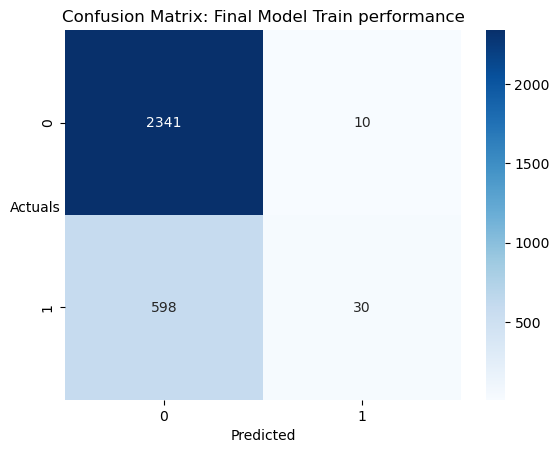

In [234]:
plt.title('Confusion Matrix: Final Model Train performance')
sns.heatmap((metrics.confusion_matrix(y_pred_df['actual'],y_pred_df['predicted'])),annot=True,fmt='.5g',cmap='Blues');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);

In [235]:
print(metrics.classification_report(y_pred_df['actual'],y_pred_df['predicted'],digits=3))

              precision    recall  f1-score   support

           0      0.797     0.996     0.885      2351
           1      0.750     0.048     0.090       628

    accuracy                          0.796      2979
   macro avg      0.773     0.522     0.487      2979
weighted avg      0.787     0.796     0.717      2979



In [236]:
def draw_roc( actual, probs ):
# Obtain fpr, tpr, thresholds
 fpr,tpr,thresholds = metrics.roc_curve( actual,probs,drop_intermediate = False )
 auc_score = metrics.roc_auc_score( actual, probs )
 plt.figure(figsize=(8, 6))
# Plot the fpr and tpr values for different threshold values
 plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
# draw a diagonal line connecting the origin and top right most point
 plt.plot([0, 1], [0, 1], 'k--')
 plt.xlim([0.0, 1.0])
 plt.ylim([0.0, 1.05])
# Setting x and y labels
 plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
 plt.ylabel('True Positive Rate')
 plt.title('AUC-ROC curve')
 plt.legend(loc='lower right')
 plt.show()
 return fpr, tpr, thresholds

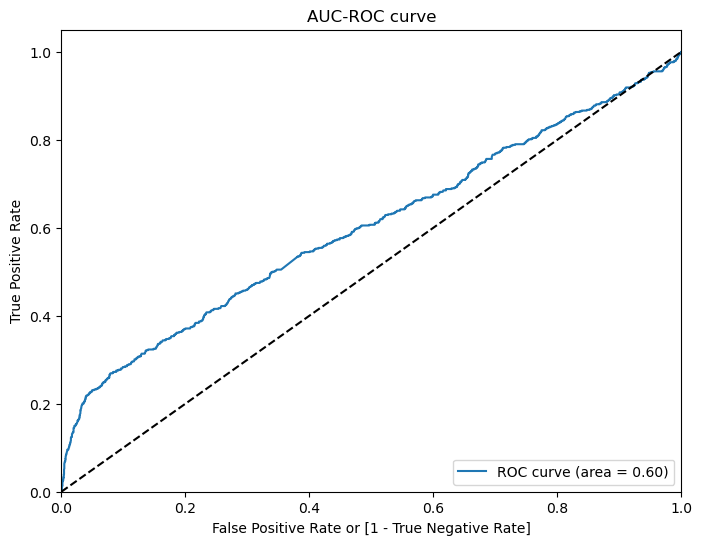

In [237]:
fpr, tpr, thresholds = draw_roc( y_pred_df.actual,y_pred_df.predicted_prob)

In [238]:
tpr_fpr = pd.DataFrame( { 'tpr': tpr,'fpr': fpr,'thresholds': thresholds } )
tpr_fpr['diff'] = tpr_fpr.tpr - tpr_fpr.fpr
tpr_fpr.sort_values( 'diff', ascending = False )[0:5]

tpr       fpr  thresholds      diff
304  0.269108  0.079115    0.221216  0.189993
305  0.269108  0.079541    0.221183  0.189568
306  0.269108  0.079966    0.221139  0.189142
303  0.267516  0.078690    0.221363  0.188826
307  0.269108  0.080391    0.221044  0.188717

In [239]:
# here we can see that .215 is the cutoff using Youden's method

#### Which metric is most important?

FP because it reflects the defaulter company which have been predicted and non defaulting. So we will use precision to evaluate the performance. 

precision = TP/(TP+FP)

### Model Evaluation on Test data

In [240]:
y_pred_df_test=pd.DataFrame( {'actual': y_test, 'predicted_prob': model2.predict(sm.add_constant( X_test[significant_vars]))})
y_pred_df_test

actual  predicted_prob
221        0        0.203033
3427       0        0.200847
1493       0        0.205590
2839       0        0.222638
1531       0        0.132231
...      ...             ...
3750       0        0.198470
1551       0        0.196077
1381       0        0.180552
1867       1        0.196996
50         0        0.191487

[1277 rows x 2 columns]

In [241]:
y_pred_df_test['predicted'] = y_pred_df_test.predicted_prob.map(lambda x: 1 if x > 0.5 else 0)
y_pred_df_test.sample(10, random_state = 42)

actual  predicted_prob  predicted
963        0        0.245335          0
1920       1        0.178589          0
1743       0        0.172307          0
2209       0        0.203562          0
2509       0        0.182954          0
1363       1        0.207085          0
3473       0        0.193790          0
1801       1        0.206119          0
1615       1        0.187953          0
2088       0        0.193766          0

In [242]:
y_pred_df_test['predicted'].value_counts()

predicted
0    1260
1      17
Name: count, dtype: int64

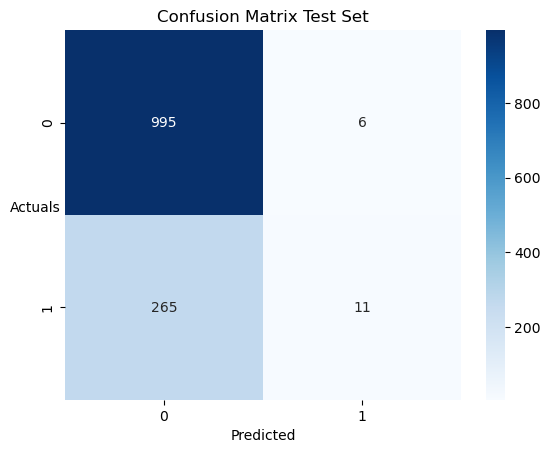

In [243]:
plt.title('Confusion Matrix Test Set')
sns.heatmap((metrics.confusion_matrix(y_pred_df_test['actual'],y_pred_df_test['predicted'])),annot=True,fmt='.5g',cmap='Blues');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);

In [658]:
print(metrics.classification_report(y_pred_df_test['actual'],y_pred_df_test['predicted'],digits=3))

              precision    recall  f1-score   support

           0      0.790     0.994     0.880      1001
           1      0.647     0.040     0.075       276

    accuracy                          0.788      1277
   macro avg      0.718     0.517     0.478      1277
weighted avg      0.759     0.788     0.706      1277



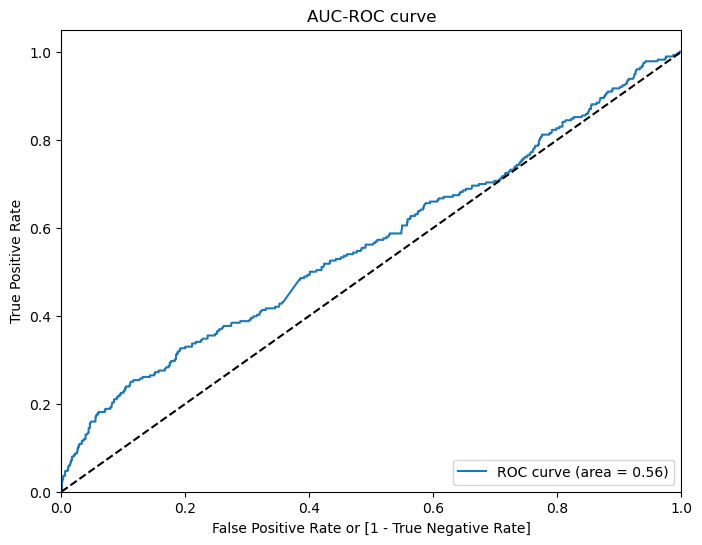

In [659]:
fpr, tpr, thresholds = draw_roc( y_pred_df_test.actual,y_pred_df_test.predicted_prob)

In [660]:
auc_score = metrics.roc_auc_score( y_pred_df_test.actual,
y_pred_df_test.predicted_prob )
round( float( auc_score ), 2 )

0.56

# Youden's Index





In [661]:
tpr_fpr = pd.DataFrame( { 'tpr': tpr,'fpr': fpr,'thresholds': thresholds } )
tpr_fpr['diff'] = tpr_fpr.tpr - tpr_fpr.fpr
tpr_fpr.sort_values( 'diff', ascending = False )[0:5]


tpr       fpr  thresholds      diff
175  0.250000  0.111888    0.213858  0.138112
180  0.253623  0.115884    0.213063  0.137739
176  0.250000  0.112887    0.213716  0.137113
181  0.253623  0.116883    0.213057  0.136740
177  0.250000  0.113886    0.213422  0.136114

sensitivity is also known as True Positive Rate (TPR) and specificity is known as
True Negative Rate (TNR). That is, select the cut-off probability for which (TPR + TNR – 1) is maximum.


tpr and fpr values, which we have stored in variables tpr, fpr, respectively.
The variable thresholds captures the corresponding cut-off probabilities. We can take difference of tpr
and fpr and then sort the values in descending order. The thresholds value, for which Eq. (5.7) is maximum,
should be the optimal cut-off.

### We can see that optimal cutoff is 0.2138
we will use this cutoff value to classify all observations above 0.0959 as defauaulter and others as non-defaulters 

In [670]:
y_pred_df_test['predicted_new'] = y_pred_df_test.predicted_prob.map(lambda x: 1 if x > 0.213 else 0)
y_pred_df_test

actual  predicted_prob  predicted  predicted_new
221        0        0.203033          0              0
3427       0        0.200847          0              0
1493       0        0.205590          0              0
2839       0        0.222638          0              1
1531       0        0.132231          0              0
...      ...             ...        ...            ...
3750       0        0.198470          0              0
1551       0        0.196077          0              0
1381       0        0.180552          0              0
1867       1        0.196996          0              0
50         0        0.191487          0              0

[1277 rows x 4 columns]

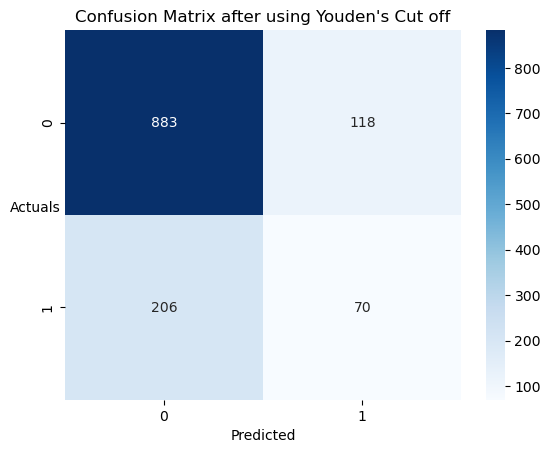

In [671]:
plt.title("Confusion Matrix after using Youden's Cut off")
sns.heatmap((metrics.confusion_matrix(y_pred_df_test['actual'],y_pred_df_test['predicted_new'])),annot=True,fmt='.5g',cmap='Blues');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);

In [672]:
print(metrics.classification_report(y_pred_df_test['actual'],y_pred_df_test['predicted_new'],digits=3))

              precision    recall  f1-score   support

           0      0.811     0.882     0.845      1001
           1      0.372     0.254     0.302       276

    accuracy                          0.746      1277
   macro avg      0.592     0.568     0.573      1277
weighted avg      0.716     0.746     0.728      1277



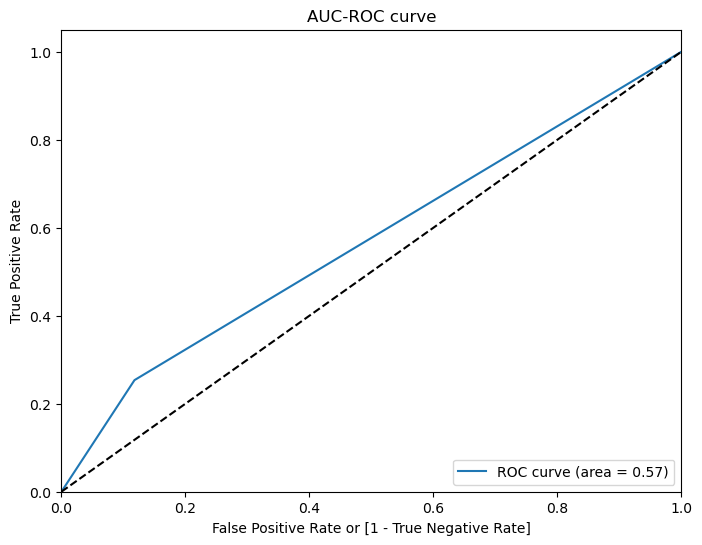

In [673]:
fpr, tpr, thresholds = draw_roc( y_pred_df_test.actual,y_pred_df_test.predicted_new)

# Random Forest

We wont do any outlier treatment or scaling for Random forest model. But we will impute missing values.

In [26]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import matplotlib.style

import statsmodels.api as sm
from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_squared_error
from statsmodels.stats.outliers_influence import variance_inflation_factor
import math

In [27]:
df=pd.read_csv("C:/Users/user/Desktop/PGDSBA/FRA/Company%28FRA%29.csv")

In [28]:
df.isnull().sum()

Num                                               0
Networth Next Year                                0
Total assets                                      0
Net worth                                         0
Total income                                    231
Change in stock                                 550
Total expenses                                  165
Profit after tax                                154
PBDITA                                          154
PBT                                             154
Cash profit                                     154
PBDITA as % of total income                      79
PBT as % of total income                         79
PAT as % of total income                         79
Cash profit as % of total income                 79
PAT as % of net worth                             0
Sales                                           305
Income from fincial services                   1111
Other income                                   1556
Total capita

In [29]:
for column in df.columns:
    if df[column].dtype != 'object':
        mean = df[column].mean()
        df[column] = df[column].fillna(mean)    
        
df.isnull().sum()  

Num                                            0
Networth Next Year                             0
Total assets                                   0
Net worth                                      0
Total income                                   0
Change in stock                                0
Total expenses                                 0
Profit after tax                               0
PBDITA                                         0
PBT                                            0
Cash profit                                    0
PBDITA as % of total income                    0
PBT as % of total income                       0
PAT as % of total income                       0
Cash profit as % of total income               0
PAT as % of net worth                          0
Sales                                          0
Income from fincial services                   0
Other income                                   0
Total capital                                  0
Reserves and funds  

In [30]:
df['Default']=np.where(df['Networth Next Year']>0,0,1)
df['Default'].value_counts()

Default
0    3352
1     904
Name: count, dtype: int64

In [31]:
# Copy all the predictor variables into X dataframe
drop_columns =['Default', 'Networth Next Year','Num']
X = df.drop(drop_columns, axis=1)

# Copy target into the y dataframe. 
Y = df['Default']

In [32]:
X.head()

Total assets  Net worth  Total income  Change in stock  Total expenses  \
0         827.6      336.5         534.1             13.5           508.7   
1          67.7       24.3         137.9             -3.7           131.0   
2         238.4       78.9         331.2            -18.1           309.2   
3        6883.5     1443.3        8448.5            212.2          8482.4   
4          90.9       47.0         388.6              3.4           392.7   

   Profit after tax  PBDITA    PBT  Cash profit  PBDITA as % of total income  \
0              38.9   124.4   64.6         95.2                        23.29   
1               3.2     5.5    1.0          3.8                         3.99   
2               3.9    25.8   10.5          9.4                         7.79   
3             178.3   418.4  185.1        178.0                         4.95   
4              -0.7     7.2   -0.6          3.9                         1.85   

   ...  Debtors turnover  Finished goods turnover  WIP turnover  \
0  ...          5.650000                 3.990000      3.370000   
1  ...         17.929029                84.369988     28.684513   
2  ...          2.510000                17.670000      8.760000   
3  ...          1.910000                18.140000     18.620000   
4  ...         68.000000                45.870000     28.670000   

   Raw material turnover  Shares outstanding  Equity face value    EPS  \
0              14.870000        8.760056e+06          10.000000   4.44   
1              17.733926        2.376491e+07       -1094.828671   0.00   
2               8.350000        2.376491e+07       -1094.828671   0.00   
3              11.110000        1.000000e+07          10.000000  17.60   
4              19.930000        1.073150e+05         100.000000  -6.52   

   Adjusted EPS  Total liabilities  PE on BSE  
0          4.44              827.6   55.46229  
1          0.00               67.7   55.46229  
2          0.00              238.4   55.46229  
3         17.60             6883.5   55.46229  
4         -6.52               90.9   55.46229  

[5 rows x 49 columns]

In [33]:
Y.value_counts()


Default
0    3352
1     904
Name: count, dtype: int64

In [34]:
904/(3352+904)*100

#In actual 21% can be considered defaulters based on the criteria.

21.2406015037594

In [35]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.30, random_state = 42)

In [36]:
X_train.shape, X_test.shape

((2979, 49), (1277, 49))

In [37]:
X_train.dtypes

Total assets                                   float64
Net worth                                      float64
Total income                                   float64
Change in stock                                float64
Total expenses                                 float64
Profit after tax                               float64
PBDITA                                         float64
PBT                                            float64
Cash profit                                    float64
PBDITA as % of total income                    float64
PBT as % of total income                       float64
PAT as % of total income                       float64
Cash profit as % of total income               float64
PAT as % of net worth                          float64
Sales                                          float64
Income from fincial services                   float64
Other income                                   float64
Total capital                                  float64
Reserves a

In [38]:
from sklearn.ensemble import RandomForestClassifier


rfc= RandomForestClassifier(criterion= 'gini', random_state=0)

rfc.fit(X_train,y_train)



RandomForestClassifier(random_state=0)

In [39]:
y_pred = rfc.predict(X_test)

In [40]:
from sklearn.metrics import accuracy_score

print('Model accuracy score with 10 decision-trees : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with 10 decision-trees : 0.7048


In [41]:
print("Train Accuracy score:",rfc.score(X_train, y_train).round(3))
print("Test Accuracy score:",rfc.score(X_test, y_test).round(3))

Train Accuracy score: 0.873
Test Accuracy score: 0.705


In [42]:
from IPython.display import Image  
#import pydotplus as pydot
from sklearn import tree
from os import system

train_char_label = ['No', 'Yes']
Credit_Tree_File = open('credit_tree.dot','w')
dot_data = tree.export_graphviz(rfc, out_file=Credit_Tree_File, feature_names = list(X_train), class_names = list(train_char_label))
Credit_Tree_File.close()

retCode = system("dot -Tpng credit_tree.dot -o credit_tree.png")
if(retCode>0):
    print("system command returning error: "+str(retCode))
else:
    display(Image("decisiontree1.png"))


In [43]:
#Creating Random forest for 100 decision trees

rfc_100 = RandomForestClassifier(n_estimators=100, random_state=0)


rfc_100.fit(X_train, y_train)


RandomForestClassifier(random_state=0)

In [55]:
y_train_pred= rfc_100.predict(X_train)


In [56]:
print('Model accuracy score for Train Set with 100 decision-trees : {0:0.4f}'. format(accuracy_score(y_train, y_train_pred)))

Model accuracy score for Train Set with 100 decision-trees : 0.8731


In [67]:
# Predict on the test set results

y_pred_test = rfc_100.predict(X_test)



# Check accuracy score 

print('Model accuracy score for Test set with 100 decision-trees : {0:0.4f}'. format(accuracy_score(y_test, y_pred_test)))

Model accuracy score for Test set with 100 decision-trees : 0.7048


In [68]:
# Print the Confusion Matrix and slice it into four pieces

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_train, y_train_pred)

print('Confusion matrix\n\n', cm)

Confusion matrix

 [[2255   68]
 [ 310  346]]


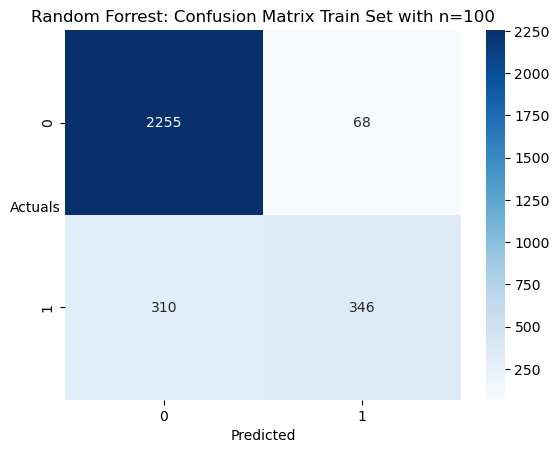

In [103]:
sns.heatmap((metrics.confusion_matrix(y_train,y_train_pred)),annot=True,fmt='.5g',cmap='Blues');
plt.title('Random Forrest: Confusion Matrix Train Set with n=100')
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);

In [104]:
from sklearn.metrics import classification_report

print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       0.88      0.97      0.92      2323
           1       0.84      0.53      0.65       656

    accuracy                           0.87      2979
   macro avg       0.86      0.75      0.78      2979
weighted avg       0.87      0.87      0.86      2979



In [105]:
# Print the Confusion Matrix and slice it into four pieces

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_test)

print('Confusion matrix\n\n', cm)

Confusion matrix

 [[872 157]
 [220  28]]


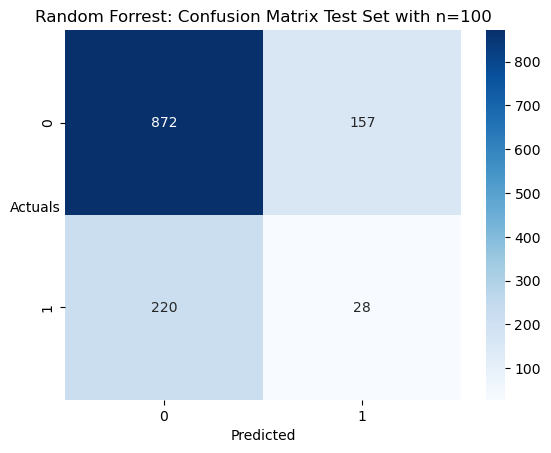

In [106]:
sns.heatmap((metrics.confusion_matrix(y_test,y_pred_test)),annot=True,fmt='.5g',cmap='Blues');
plt.title('Random Forrest: Confusion Matrix Test Set with n=100')
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);

In [107]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.80      0.85      0.82      1029
           1       0.15      0.11      0.13       248

    accuracy                           0.70      1277
   macro avg       0.47      0.48      0.48      1277
weighted avg       0.67      0.70      0.69      1277



## We will do feature selection to improve the predictive power with 100 decision trees

In [108]:
# create the classifier with n_estimators = 100

clf = RandomForestClassifier(n_estimators=100, random_state=0)



# fit the model to the training set

clf.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [109]:
# view the feature scores

feature_scores = pd.Series(clf.feature_importances_, index=X_train.columns).sort_values(ascending=False)

feature_scores

PAT as % of net worth                          0.033756
TOL/TNW                                        0.030531
Debt to equity ratio (times)                   0.029176
Net worth                                      0.026758
PBT as % of total income                       0.025824
Creditors turnover                             0.025583
PAT as % of total income                       0.025372
Total term liabilities / tangible net worth    0.025048
Shareholders funds                             0.024627
Quick ratio (times)                            0.023618
Reserves and funds                             0.023598
Cumulative retained profits                    0.023003
Profit after tax                               0.022934
PBDITA as % of total income                    0.022164
Cash profit as % of total income               0.022068
Net working capital                            0.022012
Cash to average cost of sales per day          0.021955
Current ratio (times)                          0

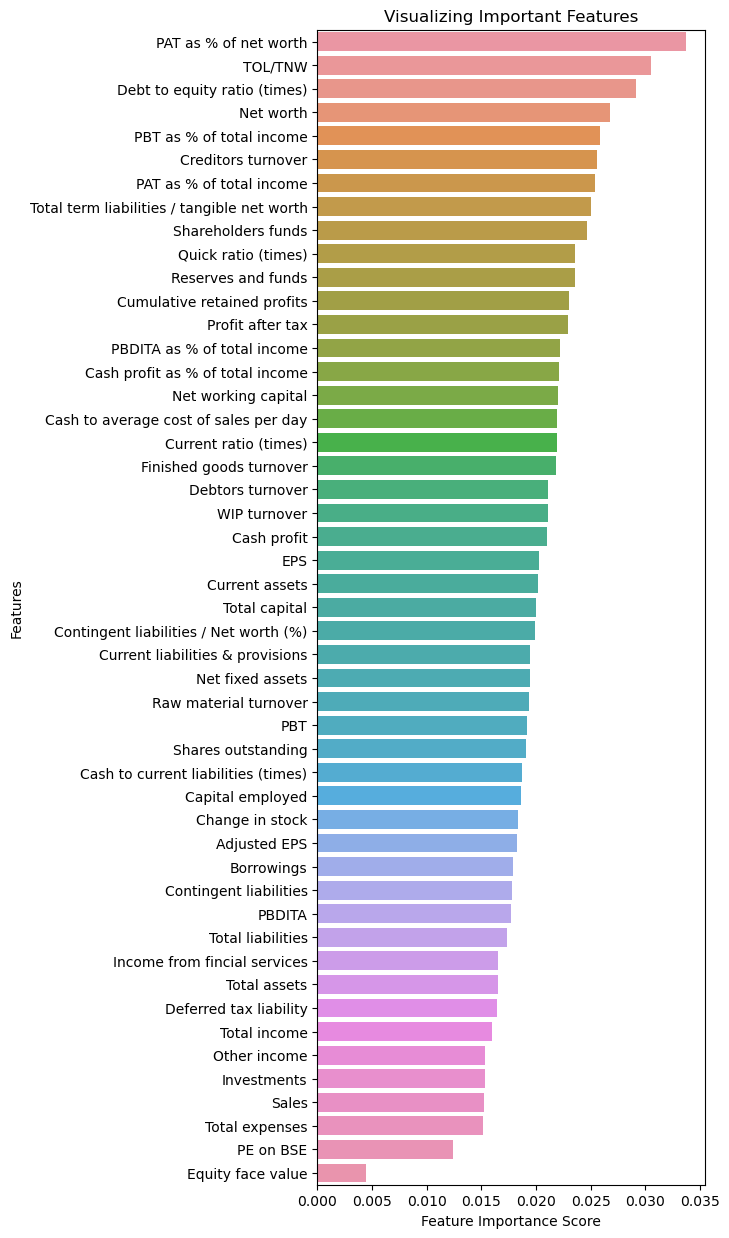

In [110]:
# Creating a seaborn bar plot
plt.figure(figsize =(5,15))
sns.barplot(x=feature_scores, y=feature_scores.index)



# Add labels to the graph

plt.xlabel('Feature Importance Score')

plt.ylabel('Features')



# Add title to the graph

plt.title("Visualizing Important Features")

# Visualize the graph

plt.show()

In [111]:
# Copy all the predictor variables into X dataframe
drop_columns =['Default', 'Networth Next Year','Num', 'Equity face value']
X = df.drop(drop_columns, axis=1)

# Copy target into the y dataframe. 
Y = df['Default']

In [112]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.30, random_state = 42)

In [113]:
clf1 = RandomForestClassifier(random_state=0)



# fit the model to the training set

clf1.fit(X_train, y_train)


# Predict on the test set results

y_pred = clf1.predict(X_test)



# Check accuracy score 

print('Model accuracy score with doors variable removed : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with doors variable removed : 0.7040


In [114]:
y_pred_train=clf1.predict(X_train)
print('Model accuracy score for train data with variable removed : {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))

Model accuracy score for train data with variable removed : 0.8731


In [115]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_train, y_pred_train)

print('Confusion matrix\n\n', cm)

Confusion matrix

 [[2254   69]
 [ 309  347]]


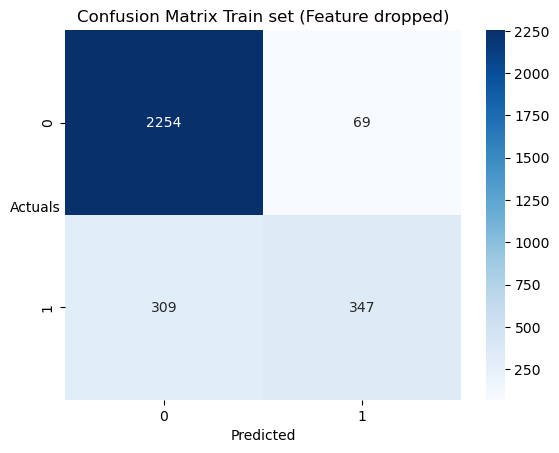

In [117]:
sns.heatmap((metrics.confusion_matrix(y_train,y_pred_train)),annot=True,fmt='.5g',cmap='Blues');
plt.title('Confusion Matrix Train set (Feature dropped)')
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);

In [118]:
from sklearn.metrics import classification_report

print(classification_report(y_train, y_pred_train))

              precision    recall  f1-score   support

           0       0.88      0.97      0.92      2323
           1       0.83      0.53      0.65       656

    accuracy                           0.87      2979
   macro avg       0.86      0.75      0.79      2979
weighted avg       0.87      0.87      0.86      2979



When we test the model by removing least import feature. the accuracy score drops from 0.7048 to 0.7040. Therefore, we will keep the features intact without losing the accuracy score.

In [119]:
# Print the Confusion Matrix and slice it into four pieces

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

print('Confusion matrix\n\n', cm)

Confusion matrix

 [[873 156]
 [222  26]]


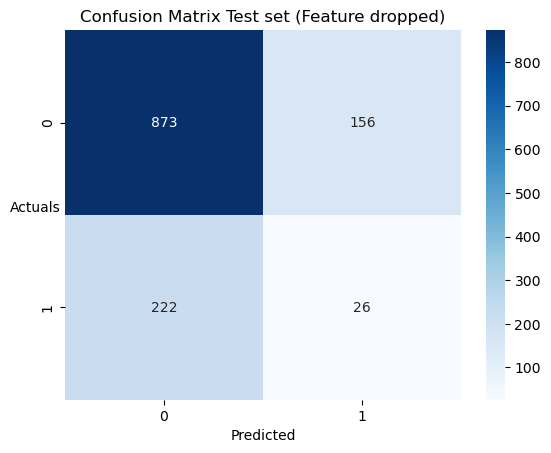

In [120]:
sns.heatmap((metrics.confusion_matrix(y_test,y_pred)),annot=True,fmt='.5g',cmap='Blues');
plt.title('Confusion Matrix Test set (Feature dropped)')
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);

In [121]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.85      0.82      1029
           1       0.14      0.10      0.12       248

    accuracy                           0.70      1277
   macro avg       0.47      0.48      0.47      1277
weighted avg       0.67      0.70      0.69      1277



## Hyper parameter tuning

In [77]:
n_est = [100]
max_d = [2,4,6,8,None]
max_f = [0.2,0.6,1]
boot = [True, False]
max_s = [0.5, 0.75, 1]

In [78]:
param_dict = {'n_estimators': n_est, 'max_depth': max_d, 'max_features': max_f, 'max_samples' : max_s, 'bootstrap' : boot}

In [79]:
from sklearn.model_selection import GridSearchCV

grid = GridSearchCV(
    estimator = rfc, param_grid = param_dict, cv=10, n_jobs=4
)

In [80]:
grid.fit(X_train, y_train)

C:\Users\user\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
450 fits failed out of a total of 900.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
450 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\user\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\user\anaconda3\Lib\site-packages\sklearn\base.py", line 1151, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\user\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py", line 402, in fit
    raise ValueError(


GridSearchCV(cv=10, estimator=RandomForestClassifier(random_state=0), n_jobs=4,
             param_grid={'bootstrap': [True, False],
                         'max_depth': [2, 4, 6, 8, None],
                         'max_features': [0.2, 0.6, 1],
                         'max_samples': [0.5, 0.75, 1], 'n_estimators': [100]})

In [82]:
y_pred = grid.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [83]:
y_test

184     0
1018    0
2909    0
2704    0
602     0
       ..
1550    0
1767    0
2643    1
3603    0
883     0
Name: Default, Length: 1277, dtype: int32

In [84]:
grid.best_estimator_

RandomForestClassifier(max_depth=2, max_features=0.6, max_samples=0.75,
                       random_state=0)

In [85]:
grid.best_params_

{'bootstrap': True,
 'max_depth': 2,
 'max_features': 0.6,
 'max_samples': 0.75,
 'n_estimators': 100}

In [86]:
grid.best_score_ * 100

78.88470838135267

In [87]:
# Copy all the predictor variables into X dataframe
drop_columns =['Default', 'Networth Next Year','Num']
X = df.drop(drop_columns, axis=1)

# Copy target into the y dataframe. 
y = df['Default']

In [88]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 42)

In [89]:
clf2 = RandomForestClassifier(bootstrap = True, max_depth= 2,max_features= 0.6, max_samples= 0.75, n_estimators= 100,random_state=0)



# fit the model to the training set

clf2.fit(X_train, y_train)


# Predict on the test set results
y_pred_train=clf2.predict(X_train)
y_pred = clf2.predict(X_test)



# Check accuracy score 

print('Model accuracy score with doors variable removed : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with doors variable removed : 0.8089


In [97]:
print("Train Accuracy score:",clf2.score(X_train, y_train).round(3))
print("Test Accuracy score:",clf2.score(X_test, y_test).round(3))

Train Accuracy score: 0.797
Test Accuracy score: 0.809


In [98]:
# Print the Confusion Matrix and slice it into four pieces

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_train, y_pred_train)

print('Confusion matrix\n\n', cm)

Confusion matrix

 [[2280   43]
 [ 561   95]]


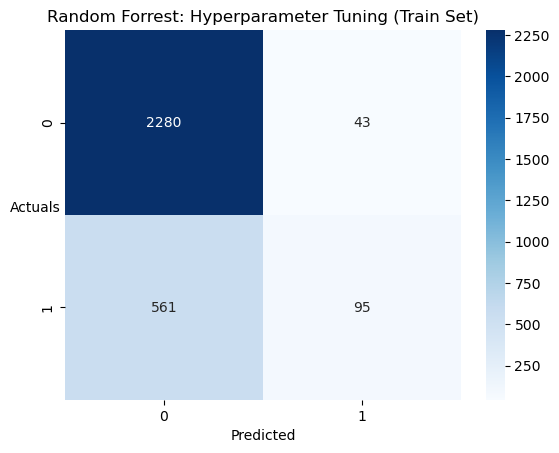

In [99]:
sns.heatmap((metrics.confusion_matrix(y_train,y_pred_train)),annot=True,fmt='.5g',cmap='Blues');
plt.title('Random Forrest: Hyperparameter Tuning (Train Set)')
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);

In [100]:
from sklearn.metrics import classification_report

print(classification_report(y_train, y_pred_train))

              precision    recall  f1-score   support

           0       0.80      0.98      0.88      2323
           1       0.69      0.14      0.24       656

    accuracy                           0.80      2979
   macro avg       0.75      0.56      0.56      2979
weighted avg       0.78      0.80      0.74      2979



In [101]:
# Print the Confusion Matrix and slice it into four pieces

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

print('Confusion matrix\n\n', cm)

Confusion matrix

 [[1011   18]
 [ 226   22]]


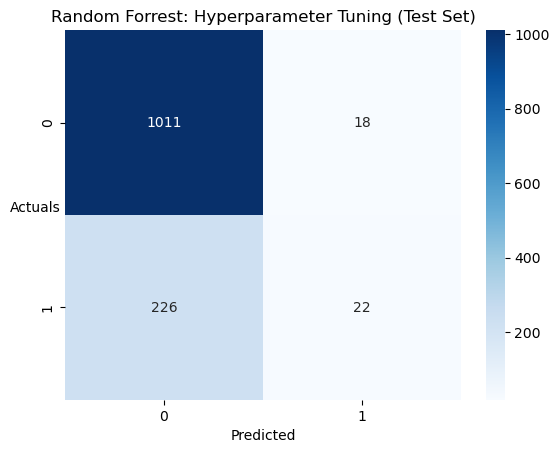

In [95]:
sns.heatmap((metrics.confusion_matrix(y_test,y_pred)),annot=True,fmt='.5g',cmap='Blues');
plt.title('Random Forrest: Hyperparameter Tuning (Test Set)')
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);

In [96]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.98      0.89      1029
           1       0.55      0.09      0.15       248

    accuracy                           0.81      1277
   macro avg       0.68      0.54      0.52      1277
weighted avg       0.77      0.81      0.75      1277



# PART B

In [123]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns 
color = sns.color_palette()
import sklearn.metrics as metrics
from scipy.stats import norm 

import warnings
warnings.filterwarnings("ignore")

In [124]:
stock_prices = pd.read_csv('C:/Users/user/Desktop/PGDSBA/FRA/Market_Risk_Data_coded.csv')

#Glimpse of Data
stock_prices.head()

Date  ITC Limited  Bharti Airtel  Tata Motors  DLF Limited  Yes Bank
0  28-03-2016          217            316          386          114       173
1  04-04-2016          218            302          386          121       171
2  11-04-2016          215            308          374          120       171
3  18-04-2016          223            320          408          122       172
4  25-04-2016          214            319          418          122       175

In [125]:
print('The number of rows (observations) is',stock_prices.shape[0],'\n''The number of columns (variables) is',stock_prices.shape[1])

The number of rows (observations) is 418 
The number of columns (variables) is 6


In [126]:
stock_prices['Date'] = [pd.to_datetime(d) for d in stock_prices['Date']]

Text(0.5, 1.0, 'DIS Stock Price 1/1/17 - 8/1/19')

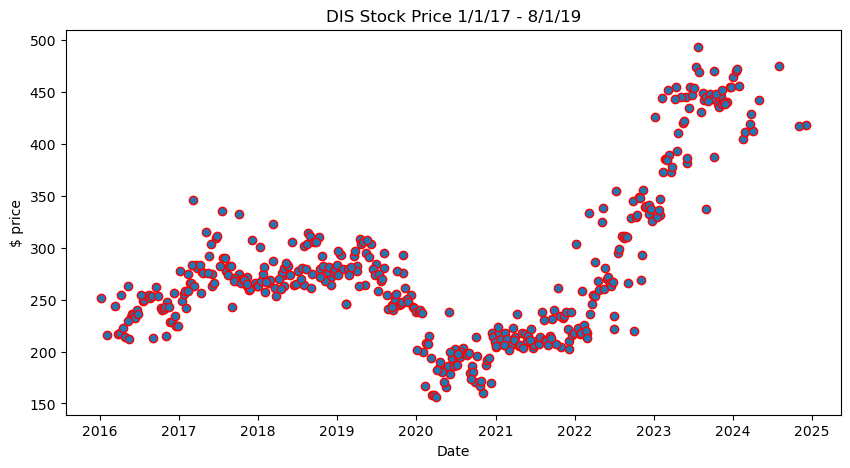

In [127]:
plt.figure(figsize=(10,5))
plt.scatter(stock_prices['Date'], stock_prices['ITC Limited'], edgecolors='r')
#plt.plot(stock_prices.index, stock_prices['Adj_Close'])
plt.xlabel("Date")
plt.ylabel("$ price")
plt.title("DIS Stock Price 1/1/17 - 8/1/19")

In [128]:
stock_prices["average10"] = stock_prices['ITC Limited'].rolling(window=10).mean()
stock_prices["average20"] = stock_prices['ITC Limited'].rolling(window=20).mean()
stock_prices["average10"].head(20)

0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
5       NaN
6       NaN
7       NaN
8       NaN
9     219.7
10    221.6
11    223.0
12    225.5
13    226.8
14    230.8
15    234.0
16    237.6
17    241.4
18    243.3
19    245.0
Name: average10, dtype: float64

In [129]:
stock_prices["std10"] = stock_prices['ITC Limited'].rolling(window=10).std()
stock_prices["std20"] = stock_prices['ITC Limited'].rolling(window=20).std()

In [130]:
def RSI (data, time_window):
    diff = data.diff(1).dropna()        # diff in one field(one day)

    #this preserves dimensions of diff values
    up_chg = 0 * diff
    down_chg = 0 * diff
    
    # up change is equal to the positive difference, otherwise equal to zero
    up_chg[diff > 0] = diff[ diff>0 ]
    
    # down change is equal to negative deifference, otherwise equal to zero
    down_chg[diff < 0] = diff[ diff < 0 ]
    
    up_chg_avg   = up_chg.ewm(com=time_window-1 , min_periods=time_window).mean()
    down_chg_avg = down_chg.ewm(com=time_window-1 , min_periods=time_window).mean()
    
    rs = abs(up_chg_avg/down_chg_avg)
    rsi = 100 - 100/(1+rs)
    return rsi

In [131]:
stock_prices['rsi5'] = RSI(stock_prices['ITC Limited'], 5)
stock_prices['rsi14'] = RSI(stock_prices['ITC Limited'], 14)

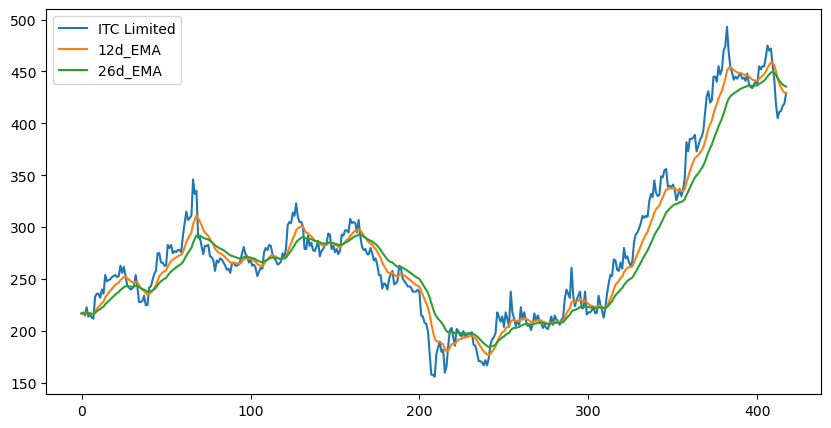

In [132]:
stock_prices['12d_EMA'] = stock_prices['ITC Limited'].ewm(span=12, adjust=False).mean()
stock_prices['26d_EMA'] = stock_prices['ITC Limited'].ewm(span=26, adjust=False).mean()

stock_prices[['ITC Limited','12d_EMA','26d_EMA']].plot(figsize=(10,5))
plt.show()

In [133]:
stock_prices['macd'] = stock_prices['12d_EMA'] - stock_prices['26d_EMA'] 

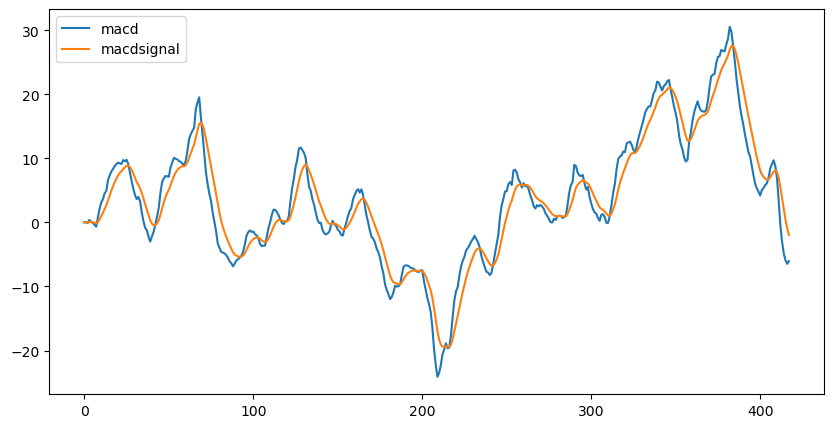

In [134]:
stock_prices['macdsignal'] = stock_prices.macd.ewm(span=9, adjust=False).mean()

stock_prices[['macd','macdsignal']].plot(figsize=(10,5))
plt.show()

In [135]:
MA = stock_prices['ITC Limited'].rolling(window=20).mean()
SD = stock_prices['ITC Limited'].rolling(window=20).std()
stock_prices['UpperBB'] = MA + (2 * SD) 
stock_prices['LowerBB'] = MA - (2 * SD)

<Axes: >

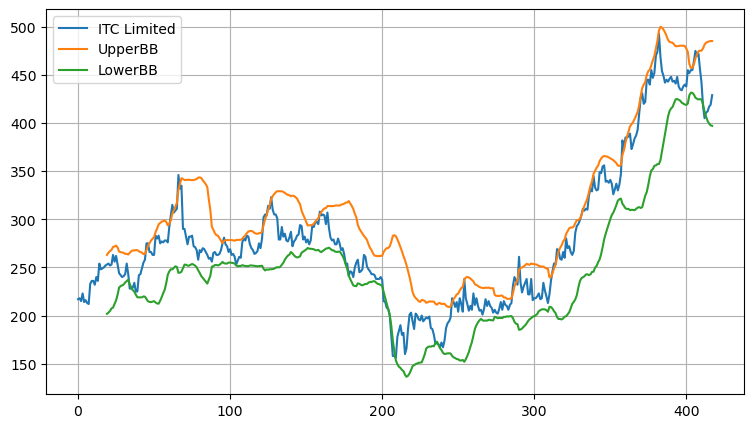

In [136]:
pd.concat([stock_prices['ITC Limited'],stock_prices.UpperBB,stock_prices.LowerBB],axis=1).plot(figsize=(9,5),grid=True)

Steps: We clean the output and generated a column called direction basis the following:

If Price > upper Bollinger band, and MACD value > MACD signal -> Buy signal (1)

If Price < lower Bollinger band, and MACD value < MACD signal -> Sell signal (-1)

Else, Out of the market -> Signal OOM(0)

In [137]:
# Define Signal
stock_prices['Direction'] = np.where((stock_prices['macd'] > stock_prices['macdsignal']) & 
                                      (stock_prices['ITC Limited'] > stock_prices['UpperBB']), 1, 
                                     np.where((stock_prices['macd'] < stock_prices['macdsignal']) & 
                                               (stock_prices['ITC Limited'] < stock_prices['LowerBB']),-1,0))



stock_prices['Direction']

0      0
1      0
2      0
3      0
4      0
      ..
413    0
414    0
415    0
416    0
417    0
Name: Direction, Length: 418, dtype: int32

In [138]:
stock_prices['Direction'].value_counts()

Direction
 0    377
 1     27
-1     14
Name: count, dtype: int64

In [139]:
ITC_final = stock_prices[['ITC Limited','average10', 'average20', 'std10', 'std20', 'rsi5', 'rsi14', 'Direction']]

In [140]:
X = ICICI_final.drop(['Direction'], axis=1)
y = ICICI_final['Direction']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=142,stratify=y)
                                             
Train_ITC = pd.concat([X_train,y_train], axis=1)
Test_ITC = pd.concat([X_test,y_test], axis=1)



NameError: name 'ICICI_final' is not defined

In [141]:
Train_ITC = pd.read_csv('Train_icici.csv')
Test_ITC = pd.read_csv('Test_icici.csv')

In [142]:
Train_ITC['Direction'].value_counts()

Direction
 0    263
 1     19
-1     10
Name: count, dtype: int64

In [143]:
Test_ITC['Direction'].value_counts()

Direction
 0    114
 1      8
-1      4
Name: count, dtype: int64

In [144]:
#creating list of columns in the dataset
col_train=list(Train_ITC)
col_test=list(Test_ITC)

from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='median')#Not mandatory

Train_icici = pd.DataFrame(imputer.fit_transform(Train_ITC))
Test_icici = pd.DataFrame(imputer.transform(Test_ITC))

Train_icici.columns=col_train
Test_icici.columns=col_test

Train_icici.head()

ITC Limited  average10  average20      std10      std20       rsi5  \
0        280.0      286.3     290.30  12.165982  12.026725  42.960050   
1        214.0      234.8     243.45  10.921945  12.504631   7.951965   
2        200.0      196.3     183.75   6.201254  16.199009  60.174235   
3        194.0      176.5     184.85  10.362861  12.040611  76.407523   
4        281.0      266.1     265.95   7.218033   5.844250  84.170660   

       rsi14  Direction  
0  45.107860        0.0  
1  24.895943       -1.0  
2  50.623181        0.0  
3  55.209256        0.0  
4  57.716647        1.0

In [145]:
X_train = Train_ITC.drop(['Direction'], axis=1)
y_train = Train_ITC['Direction']

X_test = Test_ITC.drop(['Direction'], axis=1)
y_test = Test_ITC['Direction']

In [146]:
X_train.columns

Index(['ITC Limited', 'average10', 'average20', 'std10', 'std20', 'rsi5',
       'rsi14'],
      dtype='object')

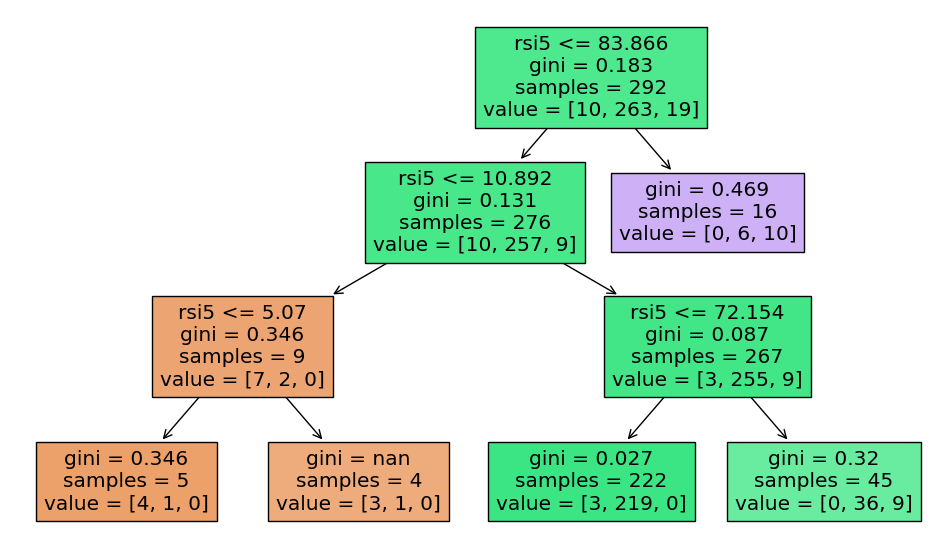

In [147]:
# Import cart model

feature_names_index = pd.Index(['ITC Limited', 'average10', 'average20', 'std10', 'std20', 'rsi5', 'rsi14'])  

# Convert Index to list  
feature_names_list = feature_names_index.tolist()  

#Visualising Dtree in Python
from sklearn import tree
import matplotlib.pyplot as plt
clf = tree.DecisionTreeClassifier(max_leaf_nodes = 5)
plt.figure(figsize=(12,7))
tree.plot_tree(clf.fit(X_train, y_train),filled=True, feature_names = feature_names_list)
plt.show()

In [148]:
clf = clf.fit(X_train, y_train)

In [149]:
y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)

model_score_train = clf.score(X_train, y_train)
model_score_test = clf.score(X_test, y_test)

In [150]:
print(metrics.classification_report(y_train,y_pred_train,digits=3))
print(metrics.classification_report(y_test,y_pred_test,digits=3))

              precision    recall  f1-score   support

          -1      0.778     0.700     0.737        10
           0      0.955     0.970     0.962       263
           1      0.625     0.526     0.571        19

    accuracy                          0.932       292
   macro avg      0.786     0.732     0.757       292
weighted avg      0.928     0.932     0.929       292

              precision    recall  f1-score   support

          -1      1.000     0.250     0.400         4
           0      0.957     0.974     0.965       114
           1      0.667     0.750     0.706         8

    accuracy                          0.937       126
   macro avg      0.875     0.658     0.690       126
weighted avg      0.940     0.937     0.931       126



PART B: Stock Price Graph Analysis
- Draw a Stock Price Graph (Stock Price vs Time) for the given stocks - Write observations


In [151]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns 
color = sns.color_palette()
import sklearn.metrics as metrics
from scipy.stats import norm 

import warnings
warnings.filterwarnings("ignore")

In [152]:
df3 = pd.read_csv('C:/Users/user/Desktop/PGDSBA/FRA/Market_Risk_Data_coded.csv')

#Glimpse of Data
stock_prices.head()

Date  ITC Limited  Bharti Airtel  Tata Motors  DLF Limited  Yes Bank  \
0 2016-03-28          217            316          386          114       173   
1 2016-04-04          218            302          386          121       171   
2 2016-11-04          215            308          374          120       171   
3 2016-04-18          223            320          408          122       172   
4 2016-04-25          214            319          418          122       175   

   average10  average20  std10  std20  rsi5  rsi14     12d_EMA     26d_EMA  \
0        NaN        NaN    NaN    NaN   NaN    NaN  217.000000  217.000000   
1        NaN        NaN    NaN    NaN   NaN    NaN  217.153846  217.074074   
2        NaN        NaN    NaN    NaN   NaN    NaN  216.822485  216.920439   
3        NaN        NaN    NaN    NaN   NaN    NaN  217.772872  217.370777   
4        NaN        NaN    NaN    NaN   NaN    NaN  217.192430  217.121090   

       macd  macdsignal  UpperBB  LowerBB  Direction  
0  0.000000    0.000000      NaN      NaN          0  
1  0.079772    0.015954      NaN      NaN          0  
2 -0.097954   -0.006827      NaN      NaN          0  
3  0.402095    0.074957      NaN      NaN          0  
4  0.071341    0.074234      NaN      NaN          0

In [153]:
df3.tail()

Date  ITC Limited  Bharti Airtel  Tata Motors  DLF Limited  \
413  26-02-2024          411           1118          937          898   
414  04-03-2024          412           1132          993          925   
415  11-03-2024          417           1186         1035          928   
416  18-03-2024          419           1225          946          826   
417  25-03-2024          429           1236          980          866   

     Yes Bank  
413        26  
414        25  
415        24  
416        24  
417        24

PART B: Stock Returns Calculation and Analysis
- Calculate Returns for all stocks 

- Calculate the Mean and Standard Deviation for the returns of all stocks 

- Draw a plot of Mean vs Standard Deviation for all stock returns - Write observations and inferences


In [154]:
returns_dict ={}


for i in df3.columns:
    if i != 'Date':
     A = df3[df3['Date']== '28-03-2016'][i].values[0]
     B = df3[df3['Date']== '25-03-2024'][i].values[0]

     Returns = B-A
     returns_dict[i]=Returns
    
returns_dict


{'ITC Limited': 212,
 'Bharti Airtel': 920,
 'Tata Motors': 594,
 'DLF Limited': 752,
 'Yes Bank': -149}

In [155]:
Returns = pd.DataFrame(returns_dict, index=[0])
print(Returns)                     

   ITC Limited  Bharti Airtel  Tata Motors  DLF Limited  Yes Bank
0          212            920          594          752      -149


In [156]:
df3.shape

(418, 6)

Text(0.5, 1.0, 'Return of stocks')

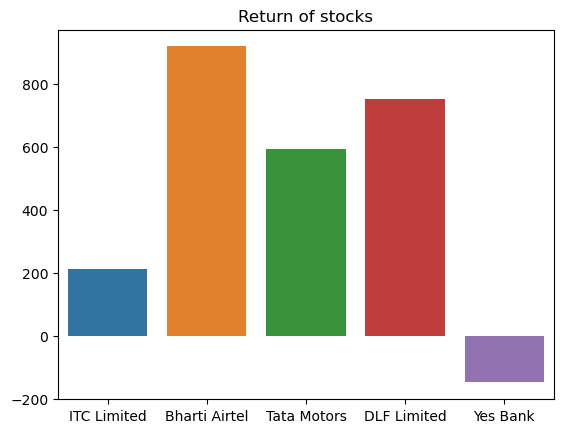

In [177]:
sns.barplot(Returns)
plt.title('Return of stocks over period')

Text(0.5, 1.0, 'ITC LTD')

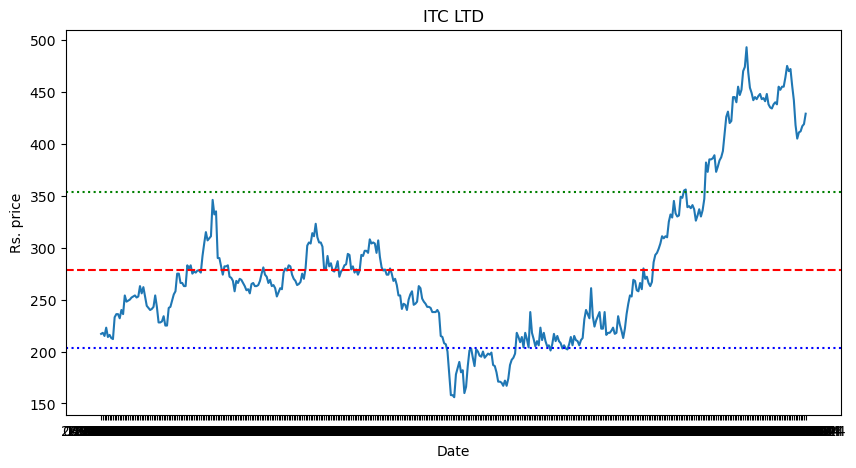

In [160]:
plt.figure(figsize=(10,5))
plt.plot(df3['Date'], df3['ITC Limited'])
plt.plot(df3['ITC Limited'].mean())

# Calculate mean and standard deviation  
mean_price = df3['ITC Limited'].mean()  
std_dev_price = df3['ITC Limited'].std()  

# Plot the mean as a horizontal line  
plt.axhline(y=mean_price, color='r', linestyle='--', label='Mean Price')  

# Plot the standard deviation lines  
plt.axhline(y=mean_price + std_dev_price, color='g', linestyle=':', label='Mean + Std Dev')  
plt.axhline(y=mean_price - std_dev_price, color='b', linestyle=':', label='Mean - Std Dev')


plt.xlabel("Date")
plt.ylabel("Rs. price")

plt.title("ITC LTD")

Text(0.5, 1.0, 'Bharti Airtel')

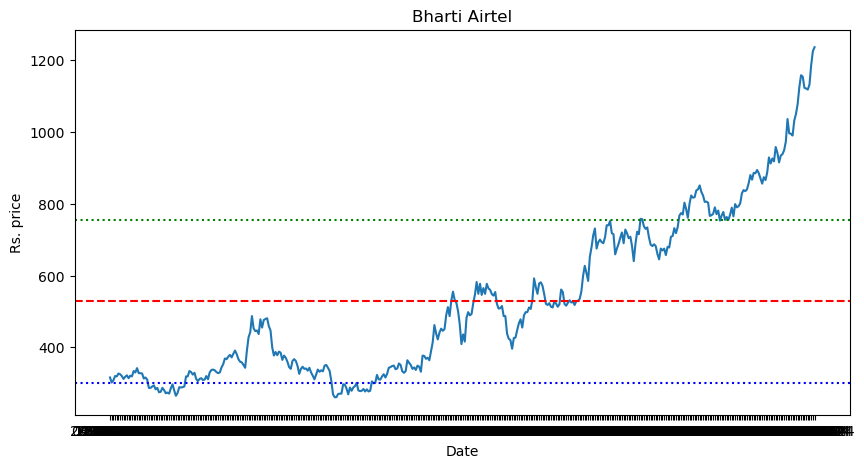

In [161]:
plt.figure(figsize=(10,5))
plt.plot(df3['Date'], df3['Bharti Airtel'])
plt.plot(df3['Bharti Airtel'].mean())

# Calculate mean and standard deviation  
mean_price = df3['Bharti Airtel'].mean()  
std_dev_price = df3['Bharti Airtel'].std()  

# Plot the mean as a horizontal line  
plt.axhline(y=mean_price, color='r', linestyle='--', label='Mean Price')  

# Plot the standard deviation lines  
plt.axhline(y=mean_price + std_dev_price, color='g', linestyle=':', label='Mean + Std Dev')  
plt.axhline(y=mean_price - std_dev_price, color='b', linestyle=':', label='Mean - Std Dev')


plt.xlabel("Date")
plt.ylabel("Rs. price")
plt.title("Bharti Airtel")

Text(0.5, 1.0, 'Tata Motors')

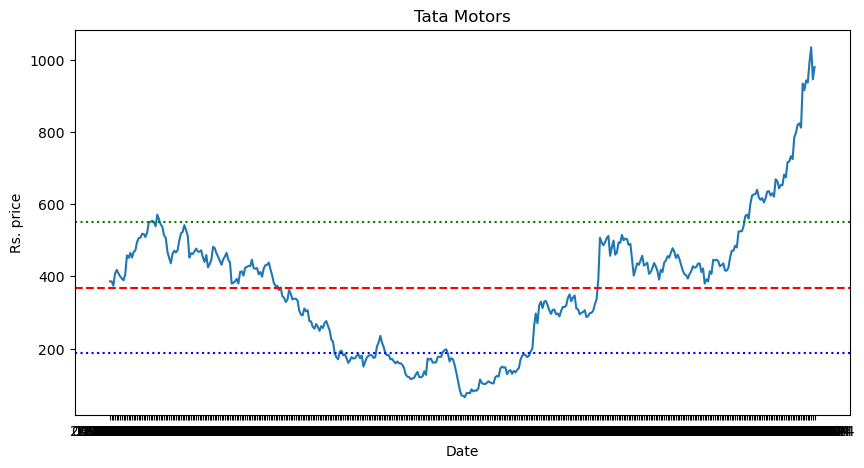

In [162]:
plt.figure(figsize=(10,5))
plt.plot(df3['Date'], df3['Tata Motors'])
plt.plot(df3['Tata Motors'].mean())

# Calculate mean and standard deviation  
mean_price = df3['Tata Motors'].mean()  
std_dev_price = df3['Tata Motors'].std()  

# Plot the mean as a horizontal line  
plt.axhline(y=mean_price, color='r', linestyle='--', label='Mean Price')  

# Plot the standard deviation lines  
plt.axhline(y=mean_price + std_dev_price, color='g', linestyle=':', label='Mean + Std Dev')  
plt.axhline(y=mean_price - std_dev_price, color='b', linestyle=':', label='Mean - Std Dev')


plt.xlabel("Date")
plt.ylabel("Rs. price")
plt.title("Tata Motors")

Text(0.5, 1.0, 'DLF Limited')

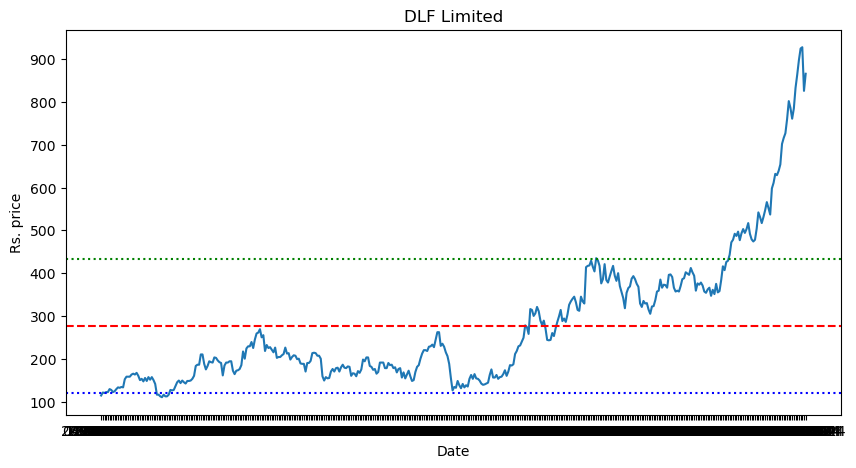

In [163]:
plt.figure(figsize=(10,5))
plt.plot(df3['Date'], df3['DLF Limited'])
plt.plot(df3['DLF Limited'].mean())

# Calculate mean and standard deviation  
mean_price = df3['DLF Limited'].mean()  
std_dev_price = df3['DLF Limited'].std()  

# Plot the mean as a horizontal line  
plt.axhline(y=mean_price, color='r', linestyle='--', label='Mean Price')  

# Plot the standard deviation lines  
plt.axhline(y=mean_price + std_dev_price, color='g', linestyle=':', label='Mean + Std Dev')  
plt.axhline(y=mean_price - std_dev_price, color='b', linestyle=':', label='Mean - Std Dev')


plt.xlabel("Date")
plt.ylabel("Rs. price")
plt.title("DLF Limited")

Text(0.5, 1.0, 'Yes Bank')

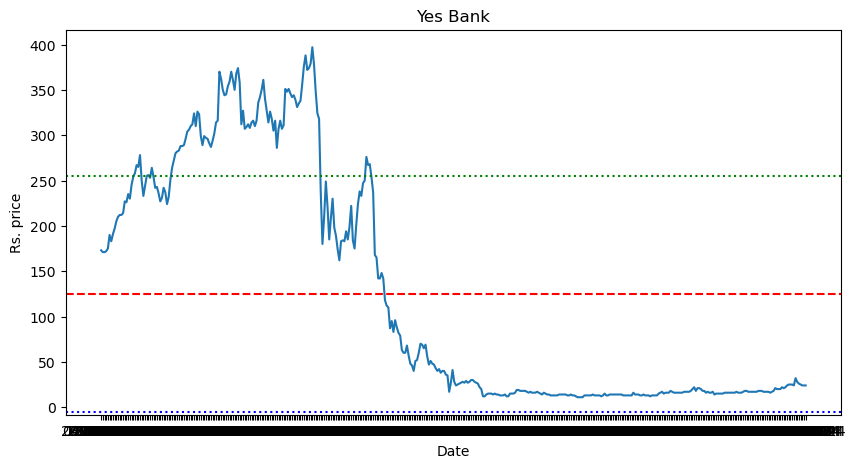

In [164]:
plt.figure(figsize=(10,5))
plt.plot(df3['Date'], df3['Yes Bank'])
plt.plot(df3['Yes Bank'].mean())

# Calculate mean and standard deviation  
mean_price = df3['Yes Bank'].mean()  
std_dev_price = df3['Yes Bank'].std()  

# Plot the mean as a horizontal line  
plt.axhline(y=mean_price, color='r', linestyle='--', label='Mean Price')  

# Plot the standard deviation lines  
plt.axhline(y=mean_price + std_dev_price, color='g', linestyle=':', label='Mean + Std Dev')  
plt.axhline(y=mean_price - std_dev_price, color='b', linestyle=':', label='Mean - Std Dev')


plt.xlabel("Date")
plt.ylabel("Rs. price")
plt.title("Yes Bank")

In [287]:
df3.head()

Date  ITC Limited  Bharti Airtel  Tata Motors  DLF Limited  Yes Bank
0  28-03-2016          217            316          386          114       173
1  04-04-2016          218            302          386          121       171
2  11-04-2016          215            308          374          120       171
3  18-04-2016          223            320          408          122       172
4  25-04-2016          214            319          418          122       175

In [288]:
returns =np.log(df3.drop('Date', axis=1)).diff(periods= 1 )


In [167]:
returns2 =(df3.drop('Date', axis=1)).diff(periods= 1 )
returns2

ITC Limited  Bharti Airtel  Tata Motors  DLF Limited  Yes Bank
0            NaN            NaN          NaN          NaN       NaN
1            1.0          -14.0          0.0          7.0      -2.0
2           -3.0            6.0        -12.0         -1.0       0.0
3            8.0           12.0         34.0          2.0       1.0
4           -9.0           -1.0         10.0          0.0       3.0
..           ...            ...          ...          ...       ...
413          6.0           -3.0         -6.0         34.0      -2.0
414          1.0           14.0         56.0         27.0      -1.0
415          5.0           54.0         42.0          3.0      -1.0
416          2.0           39.0        -89.0       -102.0       0.0
417         10.0           11.0         34.0         40.0       0.0

[418 rows x 5 columns]

In [289]:
returns.shape





(418, 5)

In [300]:
returns.head(10)

ITC Limited  Bharti Airtel  Tata Motors  DLF Limited  Yes Bank
0          NaN            NaN          NaN          NaN       NaN
1     0.004598      -0.045315     0.000000     0.059592 -0.011628
2    -0.013857       0.019673    -0.031582    -0.008299  0.000000
3     0.036534       0.038221     0.087011     0.016529  0.005831
4    -0.041196      -0.003130     0.024214     0.000000  0.017291
5     0.009302       0.024769    -0.024214     0.055791  0.082238
6    -0.013986      -0.006135    -0.019803    -0.015625 -0.037538
7    -0.004706      -0.015504    -0.015114    -0.040166  0.042787
8     0.094452      -0.025318    -0.012772     0.016261  0.030930
9     0.012793       0.019048     0.040308     0.039531  0.039806

In [168]:
means = returns2.mean()
means

ITC Limited      0.508393
Bharti Airtel    2.206235
Tata Motors      1.424460
DLF Limited      1.803357
Yes Bank        -0.357314
dtype: float64

In [170]:
std = returns2.std()
std

ITC Limited       9.309866
Bharti Airtel    19.587959
Tata Motors      19.428609
DLF Limited      16.087044
Yes Bank         11.361389
dtype: float64

In [171]:
dt= pd.DataFrame({'Average': means, 'Volatility': std})
dt

Average  Volatility
ITC Limited    0.508393    9.309866
Bharti Airtel  2.206235   19.587959
Tata Motors    1.424460   19.428609
DLF Limited    1.803357   16.087044
Yes Bank      -0.357314   11.361389

Text(0.5, 1.0, 'Mean for Stocks')

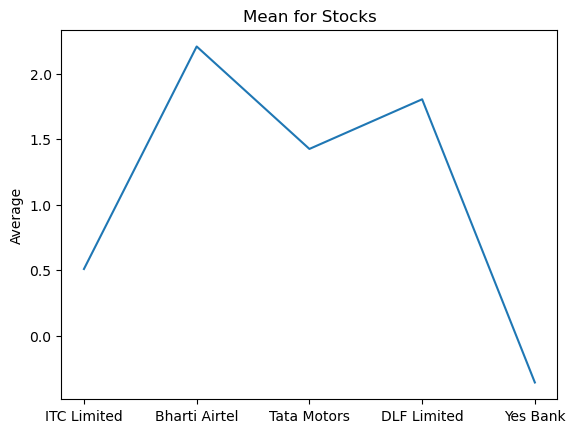

In [172]:
sns.lineplot(dt['Average'])
plt.title('Mean for Stocks')

Text(0.5, 1.0, 'Standard Deviation for Stocks')

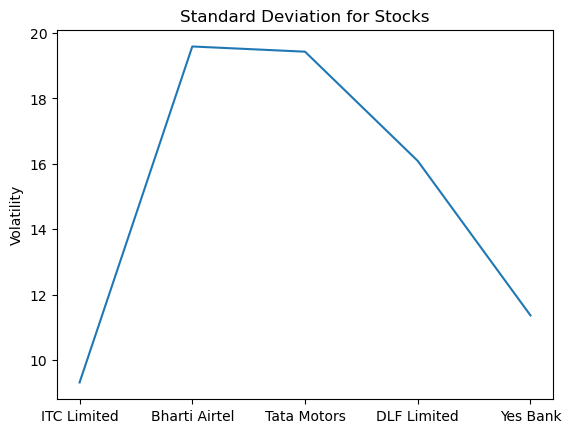

In [174]:
sns.lineplot(dt['Volatility'])
plt.title('Standard Deviation for Stocks')